# MODELIZACIÓN PARA REGRESIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

import pickle

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = '/Users/alejandrocabornerolopez/Desktop/DS4B/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/02_RETAIL'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZANDO PARA UN PRODUCTO

In [5]:
x = x.loc[(x.store_id == 'CA_3') & (x.item_id == 'FOODS_3_586')]

In [6]:
x

date store_id      item_id  ventas_mm_8  ventas_mm_7  ventas_mm_9  \
7319 2013-01-16     CA_3  FOODS_3_586        57.75        57.86        58.78   
7320 2013-01-17     CA_3  FOODS_3_586        56.38        58.43        56.44   
7321 2013-01-18     CA_3  FOODS_3_586        57.75        58.00        56.00   
7322 2013-01-19     CA_3  FOODS_3_586        57.38        55.71        57.22   
7323 2013-01-20     CA_3  FOODS_3_586        58.62        57.43        59.78   
...         ...      ...          ...          ...          ...          ...   
8363 2015-11-26     CA_3  FOODS_3_586        77.38        80.43        77.00   
8364 2015-11-27     CA_3  FOODS_3_586        82.88        85.29        79.89   
8365 2015-11-28     CA_3  FOODS_3_586        86.12        90.29        83.89   
8366 2015-11-29     CA_3  FOODS_3_586        86.88        84.29        83.56   
8367 2015-11-30     CA_3  FOODS_3_586        85.25        81.57        87.44   

      ventas_mm_6  ventas_mm_2  ventas_mm_3  ventas_mm_10  ...  \
7319        60.50        42.50        57.00         61.10  ...   
7320        58.83        45.00        43.67         57.50  ...   
7321        56.17        49.50        47.67         56.10  ...   
7322        53.83        53.00        50.67         55.70  ...   
7323        52.67        66.00        61.67         59.40  ...   
...           ...          ...          ...           ...  ...   
8363        82.83        72.50        74.67         75.40  ...   
8364        90.00        86.00        81.67         79.30  ...   
8365        87.83        96.00        88.00         81.10  ...   
8366        79.83        77.50        85.00         81.80  ...   
8367        82.00        77.50        82.33         84.40  ...   

      sell_price_lag_4  sell_price_lag_6  rotura_stock_3_lag_1  \
7319              1.58              1.58                  0.00   
7320              1.58              1.58                  0.00   
7321              1.58              1.58                  0.00   
7322              1.58              1.58                  0.00   
7323              1.58              1.58                  0.00   
...                ...               ...                   ...   
8363              1.68              1.68                  0.00   
8364              1.68              1.68                  0.00   
8365              1.68              1.68                  0.00   
8366              1.68              1.68                  0.00   
8367              1.68              1.68                  0.00   

      rotura_stock_7_lag_1  rotura_stock_15_lag_1  wday_te  \
7319                  0.00                   0.00    24.97   
7320                  0.00                   0.00    26.17   
7321                  0.00                   0.00    29.55   
7322                  0.00                   0.00    34.88   
7323                  0.00                   0.00    34.46   
...                    ...                    ...      ...   
8363                  0.00                   0.00    26.17   
8364                  0.00                   0.00    29.55   
8365                  0.00                   0.00    34.88   
8366                  0.00                   0.00    34.46   
8367                  0.00                   0.00    27.13   

      event_name_1_Christmas  weekday_te  weekday_Wednesday  month_10  
7319                    0.00       24.97               1.00      0.00  
7320                    0.00       26.17               0.00      0.00  
7321                    0.00       29.55               0.00      0.00  
7322                    0.00       34.88               0.00      0.00  
7323                    0.00       34.46               0.00      0.00  
...                      ...         ...                ...       ...  
8363                    0.00       26.17               0.00      0.00  
8364                    0.00       29.55               0.00      0.00  
8365                    0.00       34.88               0.00      0.00  

In [8]:
y = y[y.index.isin(x.index)]
y

7319     46
7320     53
7321     53
7322     79
7323     81
       ... 
8363    100
8364     92
8365     63
8366     92
8367     66
Name: ventas, Length: 1049, dtype: int64

### MODELIZAR

#### Definir las variables de modelización

In [11]:
var_modelizar = x.columns.to_list()[3:]
print(var_modelizar)

['ventas_mm_8', 'ventas_mm_7', 'ventas_mm_9', 'ventas_mm_6', 'ventas_mm_2', 'ventas_mm_3', 'ventas_mm_10', 'ventas_mm_5', 'ventas_mm_4', 'ventas_maxm_8', 'ventas_lag_1', 'ventas_mm_15', 'ventas_mm_11', 'ventas_maxm_2', 'ventas_maxm_7', 'ventas_mm_12', 'ventas_mm_14', 'ventas_mm_13', 'ventas_maxm_9', 'ventas_maxm_6', 'ventas_maxm_3', 'ventas_maxm_10', 'ventas_maxm_5', 'ventas_maxm_4', 'ventas_maxm_13', 'ventas_maxm_14', 'ventas_maxm_11', 'ventas_maxm_15', 'ventas_minm_2', 'ventas_maxm_12', 'ventas_minm_3', 'ventas_minm_4', 'ventas_minm_5', 'ventas_minm_6', 'ventas_minm_7', 'ventas_lag_2', 'ventas_minm_8', 'ventas_lag_7', 'ventas_minm_9', 'ventas_lag_6', 'ventas_minm_10', 'ventas_lag_3', 'ventas_minm_11', 'ventas_lag_8', 'ventas_minm_12', 'ventas_minm_13', 'ventas_lag_4', 'ventas_lag_5', 'ventas_minm_14', 'ventas_minm_15', 'ventas_lag_14', 'ventas_lag_13', 'ventas_lag_9', 'ventas_lag_15', 'ventas_lag_12', 'ventas_lag_10', 'ventas_lag_11', 'sell_price_lag_1', 'sell_price_lag_5', 'sell_pri

#### Definir la validacion

Para hacer *cross_validation* en series temporales, no vale la aproximación tradicional puesto que debe respetar el orden cronológico. Para ello, **TimeSeriesSplit()** se encarga de ello y necesita dos parámetros. En el primero especificamos el número de veces que queremos repetir el proceso (en este caso 3 veces), y en el segundo, *test_size* es el tamaño para la validación en las unidades temporales que estemos trabajando (horas, días, semanas, etc.). En el caso de estudio se refiere a 8 días.

In [12]:
time_cv = TimeSeriesSplit(3, test_size = 8)

#### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [13]:
pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])

grid = [   {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__min_samples_leaf': [500],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
           }
       ]

#### Optimizar los hiper parámetros

#####  Con random search

In [14]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(x[var_modelizar],y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.60          0.00             0.00            0.00   

                   param_algoritmo  \
0  HistGradientBoostingRegressor()   

                                           params  split0_test_score  \
0  {'algoritmo': HistGradientBoostingRegressor()}              -8.72   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0             -17.68             -11.03           -12.47            3.80   

   rank_test_score  
0                1

In [15]:
modelo_final = modelo.best_estimator_.fit(x[var_modelizar], y)

In [16]:
prediccion = modelo_final.predict(x[var_modelizar])

In [20]:
temp = (pd.concat([x.date.reset_index(drop=True),
                   y.reset_index(drop=True),
                   pd.Series(prediccion, name = 'prediccion')], axis = 1)
        .set_index('date'))

In [21]:
temp

ventas  prediccion
date                          
2013-01-16      46       49.76
2013-01-17      53       52.37
2013-01-18      53       55.82
2013-01-19      79       76.10
2013-01-20      81       81.00
...            ...         ...
2015-11-26     100       96.82
2015-11-27      92       90.62
2015-11-28      63       65.27
2015-11-29      92       90.86
2015-11-30      66       68.16

[1049 rows x 2 columns]

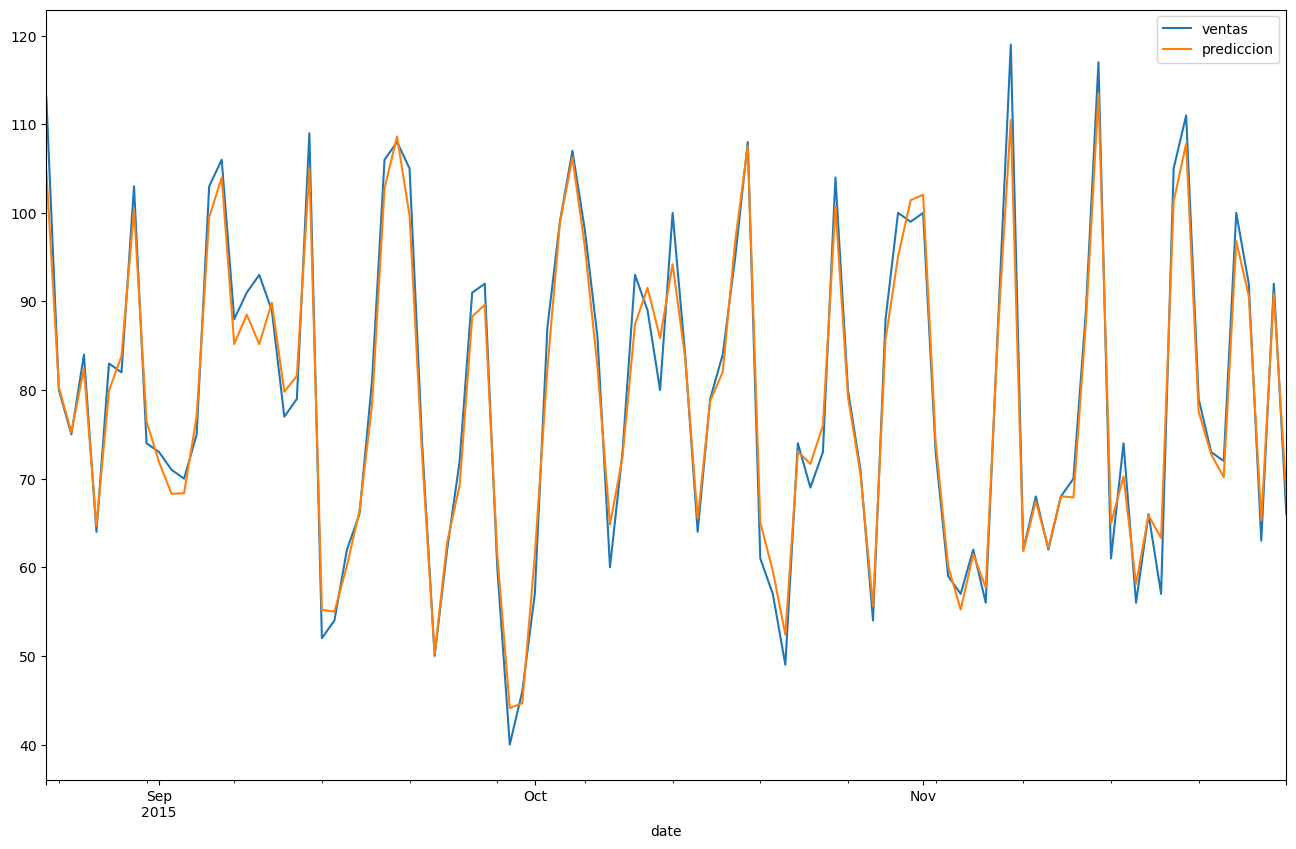

In [19]:
temp.tail(100).plot(figsize = (16,10));

## ESCALAR A TODOS LOS PRODUCTOS

### MODELIZACIÓN

Ya tenemos el proceso funcionando para modelizar un producto.

Ahora tenemos que escalarlo a todas las combinaciones de tiendas y productos.

Primero vamos a volver a importar los datos.

In [22]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

In [23]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

Incluímos como una nueva variable la combinación de tienda-producto y eliminamos las originales.

In [24]:
x.insert(loc=0,column='producto', value=x.store_id + '_' + x.item_id)
x = x.drop(columns = ['store_id', 'item_id'])
x

producto       date  ventas_mm_8  ventas_mm_7  ventas_mm_9  \
0      CA_3_FOODS_3_090 2013-01-16       233.38       236.00       228.33   
1      CA_3_FOODS_3_090 2013-01-17       230.38       235.14       228.67   
2      CA_3_FOODS_3_090 2013-01-18       227.00       224.43       223.67   
3      CA_3_FOODS_3_090 2013-01-19       224.38       225.86       226.67   
4      CA_3_FOODS_3_090 2013-01-20       242.88       227.43       239.67   
...                 ...        ...          ...          ...          ...   
20920  CA_4_FOODS_3_714 2015-11-26         9.38         9.86         9.67   
20921  CA_4_FOODS_3_714 2015-11-27        11.38        12.29        10.78   
20922  CA_4_FOODS_3_714 2015-11-28        12.00        11.57        11.22   
20923  CA_4_FOODS_3_714 2015-11-29        12.25        12.14        12.56   
20924  CA_4_FOODS_3_714 2015-11-30        11.50        11.00        11.67   

       ventas_mm_6  ventas_mm_2  ventas_mm_3  ventas_mm_10  ventas_mm_5  ...  \
0           242.50       182.00       215.00        232.50       242.00  ...   
1           233.50       174.50       185.00        224.60       237.40  ...   
2           226.17       180.50       173.00        222.80       201.20  ...   
3           205.00       197.00       195.00        223.70       189.80  ...   
4           218.50       293.00       252.00        240.20       221.00  ...   
...            ...          ...          ...           ...          ...  ...   
20920        10.67         9.00         7.00          9.50         9.80  ...   
20921        11.83        14.00        13.33         10.90        11.60  ...   
20922        11.33        16.00        12.67         10.70        10.60  ...   
20923        11.67        13.50        16.33         11.80        13.40  ...   
20924        12.33        12.00        11.33         12.00        12.40  ...   

       sell_price_lag_4  sell_price_lag_6  rotura_stock_3_lag_1  \
0                  1.25              1.25                  0.00   
1                  1.25              1.25                  0.00   
2                  1.25              1.25                  0.00   
3                  1.25              1.25                  0.00   
4                  1.25              1.25                  0.00   
...                 ...               ...                   ...   
20920              1.58              1.58                  0.00   
20921              1.58              1.58                  0.00   
20922              1.58              1.58                  0.00   
20923              1.58              1.58                  0.00   
20924              1.58              1.58                  0.00   

       rotura_stock_7_lag_1  rotura_stock_15_lag_1  wday_te  \
0                      0.00                   0.00    24.97   
1                      0.00                   0.00    26.17   
2                      0.00                   0.00    29.55   
3                      0.00                   0.00    34.88   
4                      0.00                   0.00    34.46   
...                     ...                    ...      ...   
20920                  0.00                   0.00    26.17   
20921                  0.00                   0.00    29.55   
20922                  0.00                   0.00    34.88   
20923                  0.00                   0.00    34.46   
20924                  0.00                   0.00    27.13   

       event_name_1_Christmas  weekday_te  weekday_Wednesday  month_10  
0                        0.00       24.97               1.00      0.00  
1                        0.00       26.17               0.00      0.00  
2                        0.00       29.55               0.00      0.00  
3                        0.00       34.88               0.00      0.00  
4                        0.00       34.46               0.00      0.00  
...                       ...         ...                ...       ...  
20920                    0.00       26.17               

Para poder aplicar el proceso de forma recurrente vamos a crear una lista donde cada elemento sean los datos de cada producto.

In [29]:
productos = list(x.groupby("producto"))
# Mostramos los datos para el primer producto
productos[0]

('CA_3_FOODS_3_090',
               producto       date  ventas_mm_8  ventas_mm_7  ventas_mm_9  \
 0     CA_3_FOODS_3_090 2013-01-16       233.38       236.00       228.33   
 1     CA_3_FOODS_3_090 2013-01-17       230.38       235.14       228.67   
 2     CA_3_FOODS_3_090 2013-01-18       227.00       224.43       223.67   
 3     CA_3_FOODS_3_090 2013-01-19       224.38       225.86       226.67   
 4     CA_3_FOODS_3_090 2013-01-20       242.88       227.43       239.67   
 ...                ...        ...          ...          ...          ...   
 1044  CA_3_FOODS_3_090 2015-11-26       134.50       139.43       126.11   
 1045  CA_3_FOODS_3_090 2015-11-27       154.00       166.43       148.00   
 1046  CA_3_FOODS_3_090 2015-11-28       154.12       157.71       144.44   
 1047  CA_3_FOODS_3_090 2015-11-29       149.12       150.43       146.89   
 1048  CA_3_FOODS_3_090 2015-11-30       139.38       143.29       139.44   
 
       ventas_mm_6  ventas_mm_2  ventas_mm_3  ventas_

Encapsulamos el proceso de modelización individual en una función, a la que iremos llamando en cada producto.

In [31]:
#Recibe los datos de las x y la y de cada producto

def modelizar(x_producto, y):
          
    #Excluye el producto como variable de modelización
    var_modelizar = x_producto.columns.to_list()[2:]
    
    #Define la validación cruzada
    time_cv = TimeSeriesSplit(3, test_size = 8)
    
    #Define la parrilla de algoritmos
    pipe = Pipeline([('algoritmo',HistGradientBoostingRegressor())])
    grid = [ 
         {'algoritmo': [HistGradientBoostingRegressor()]
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_iter': [50,100,200],
#          'algoritmo__max_depth': [5,10,20,50],
#          'algoritmo__scoring': ['neg_mean_absolute_error'],
#          'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]
         }
                       
    ]
           
    #Crea los modelos
    random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 1, 
                                   cv = time_cv, 
                                   scoring = 'neg_mean_absolute_error', 
                                   verbose = 0,
                                   n_jobs = -1)
    
    modelo = random_search.fit(x_producto[var_modelizar],y)
    
    #Reentrena el mejor sobre todos los datos
    modelo_final = modelo.best_estimator_.fit(x_producto[var_modelizar],y)
    
    #Devuelve como salida el modelo final
    return(modelo_final)

Creamos otra lista vacía donde vamos a ir guardando los modelos entrenados de cada producto.

In [32]:
lista_modelos = []

Recorremos cada elemento de la lista de productos y vamos rellendando lista_modelos con el nombre y modelo final de cada producto.

In [35]:
for cada in productos:
    #Renombra por claridad
    producto = cada[0]
    datos = cada[1]
    #Selecciona solo los datos de la target que se corresponden con el producto
    y_cada = y[y.index.isin(datos.index)]

    #Llama a la funcion de modelizar
    modelo = modelizar(datos, y_cada)
    #Añade el modelo final a la lista
    lista_modelos.append((producto, modelo))

In [36]:
lista_modelos

[('CA_3_FOODS_3_090',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_120',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_202',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_252',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_288',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_329',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_555',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_586',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_587',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_3_FOODS_3_714',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),
 ('CA_4_FOODS_3_090',
  Pipeline(steps=[('algoritmo', HistGradientBoostingRegressor())])),

Comprobamos.

NOTA: El objetivo aquí no es evaluar la calidad del modelo, ya que no estamos usando los datos de entrenamiento.

Es simplemente comprobar que el proceso funciona bien y no vemos nada raro antes de continuar.

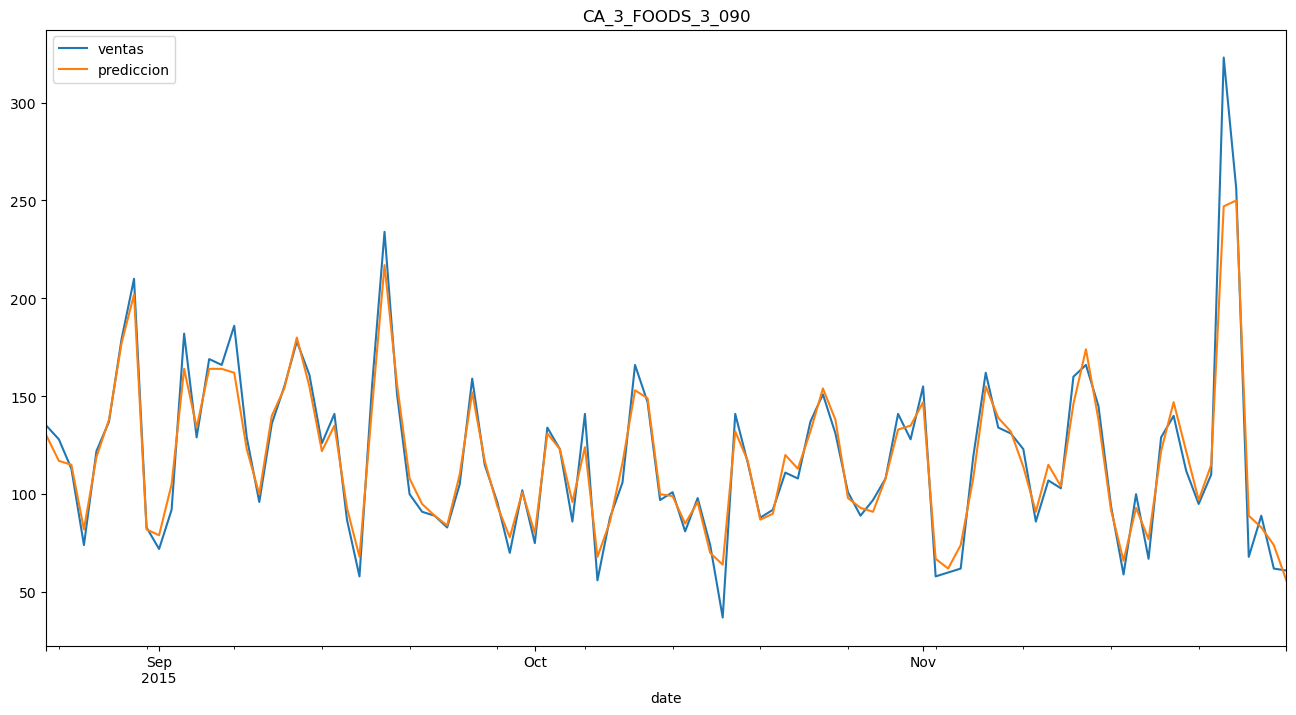

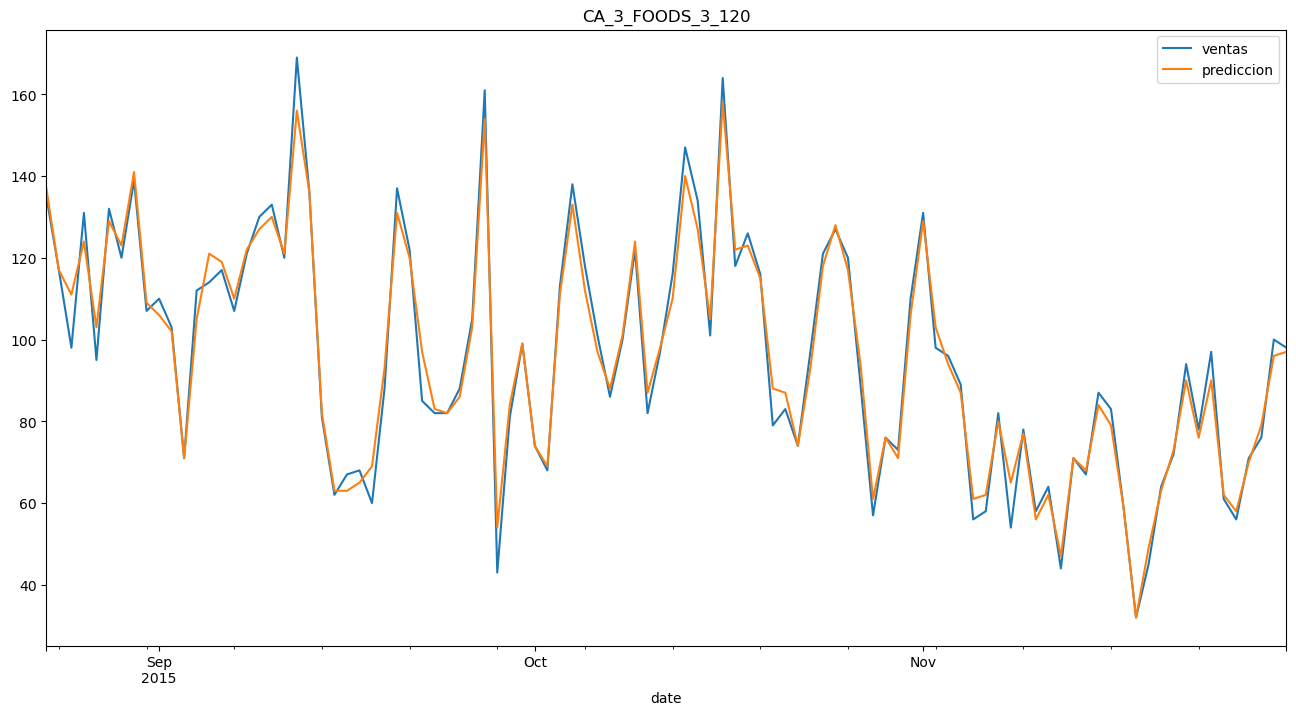

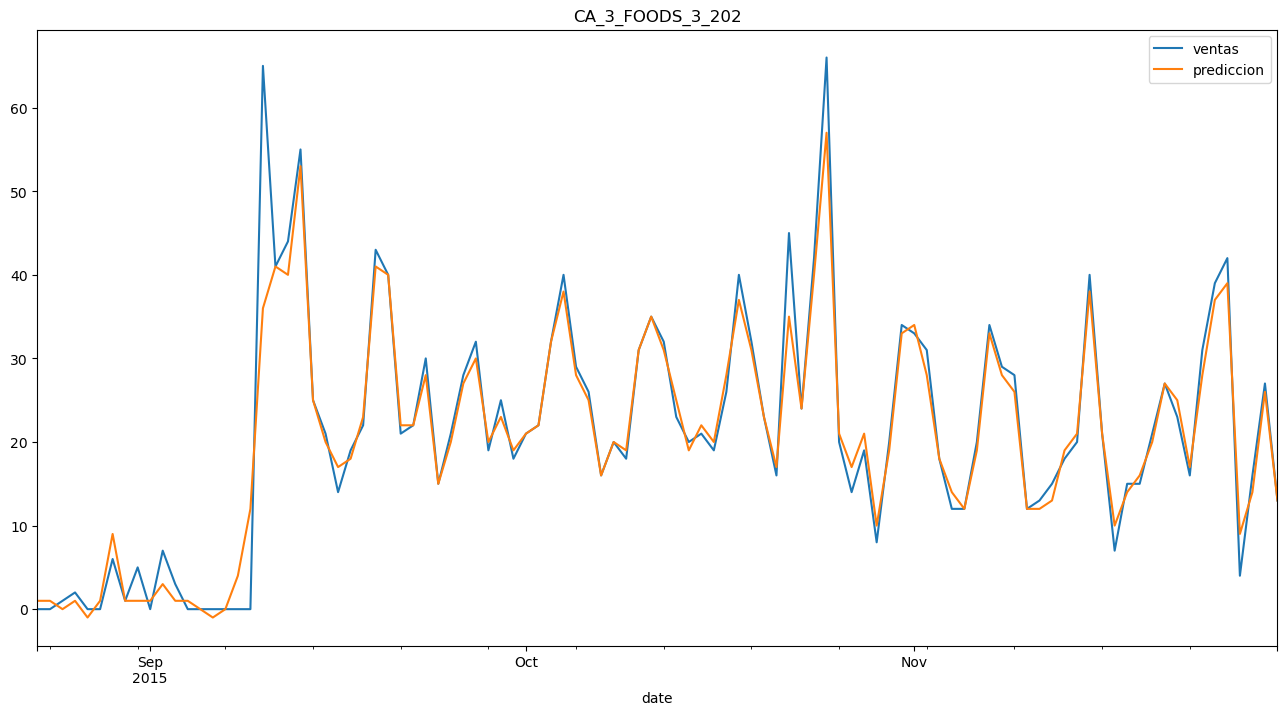

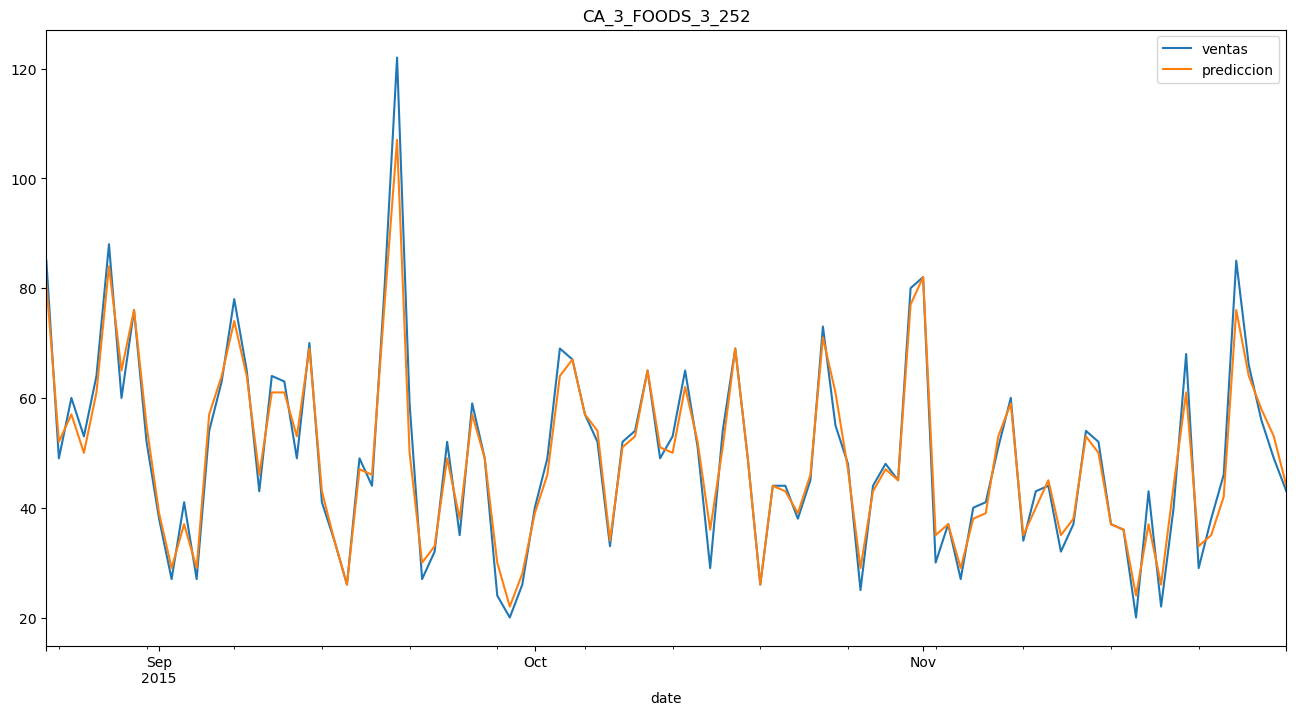

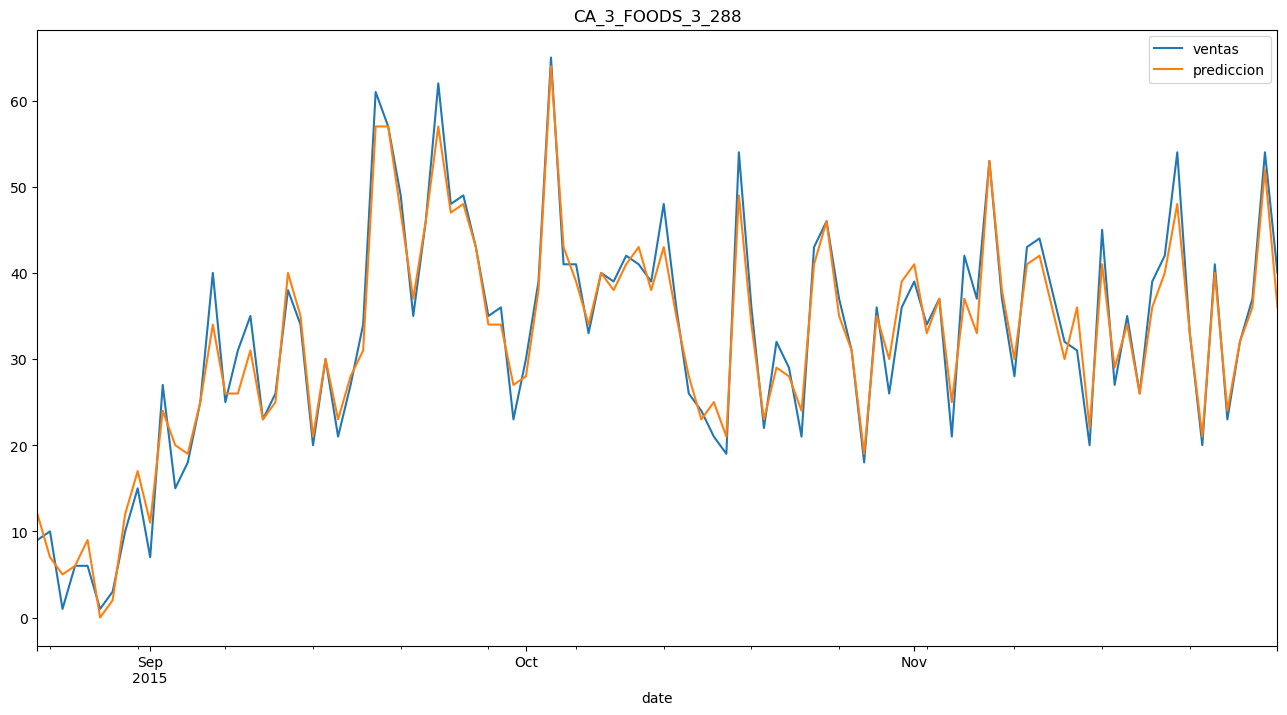

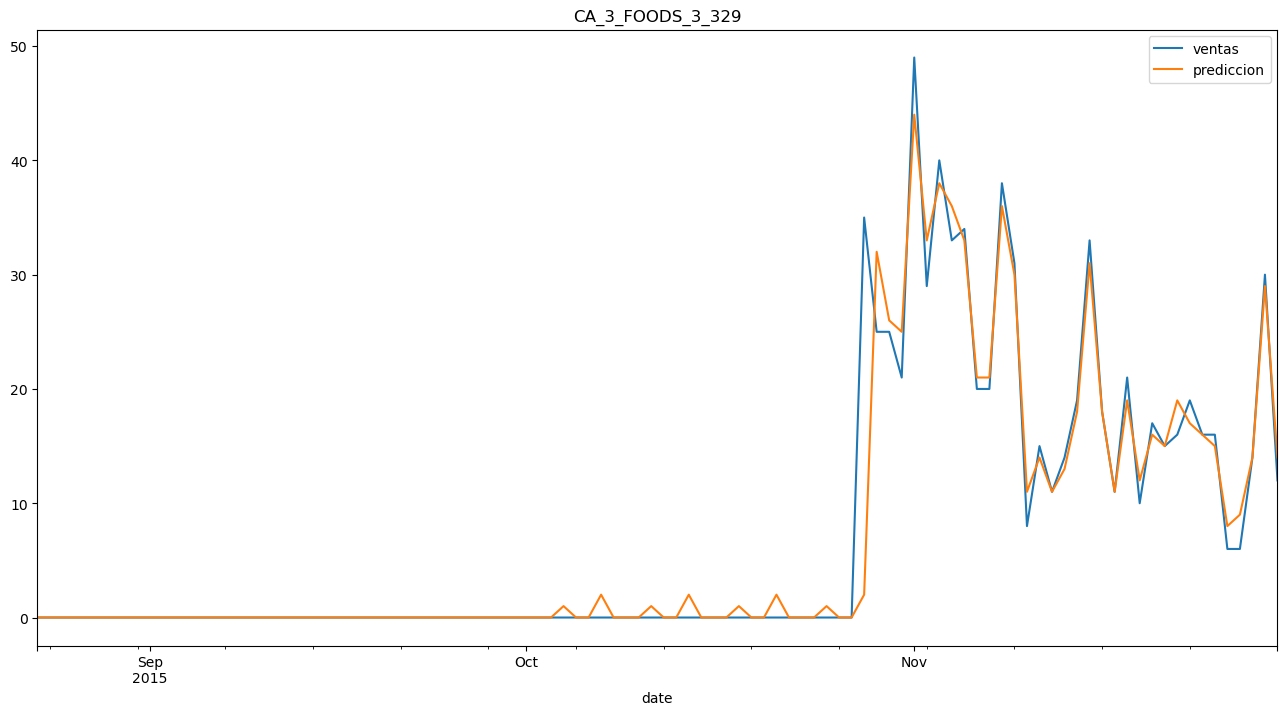

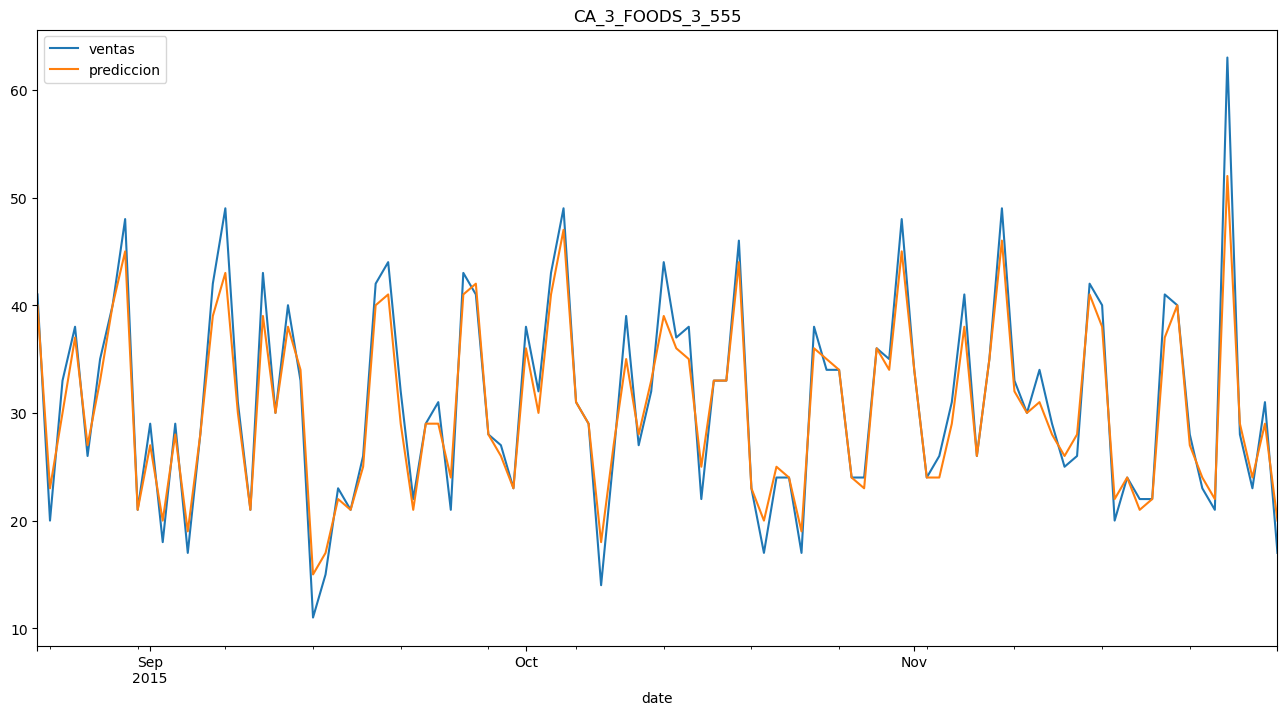

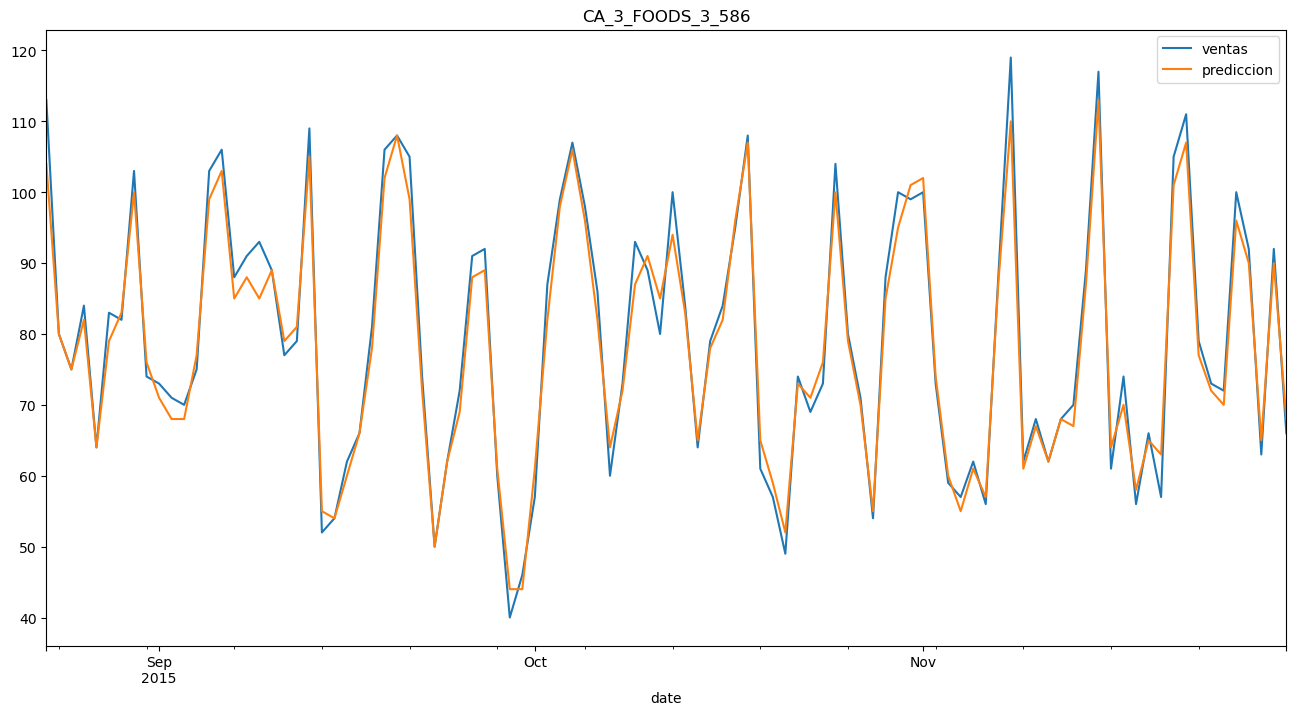

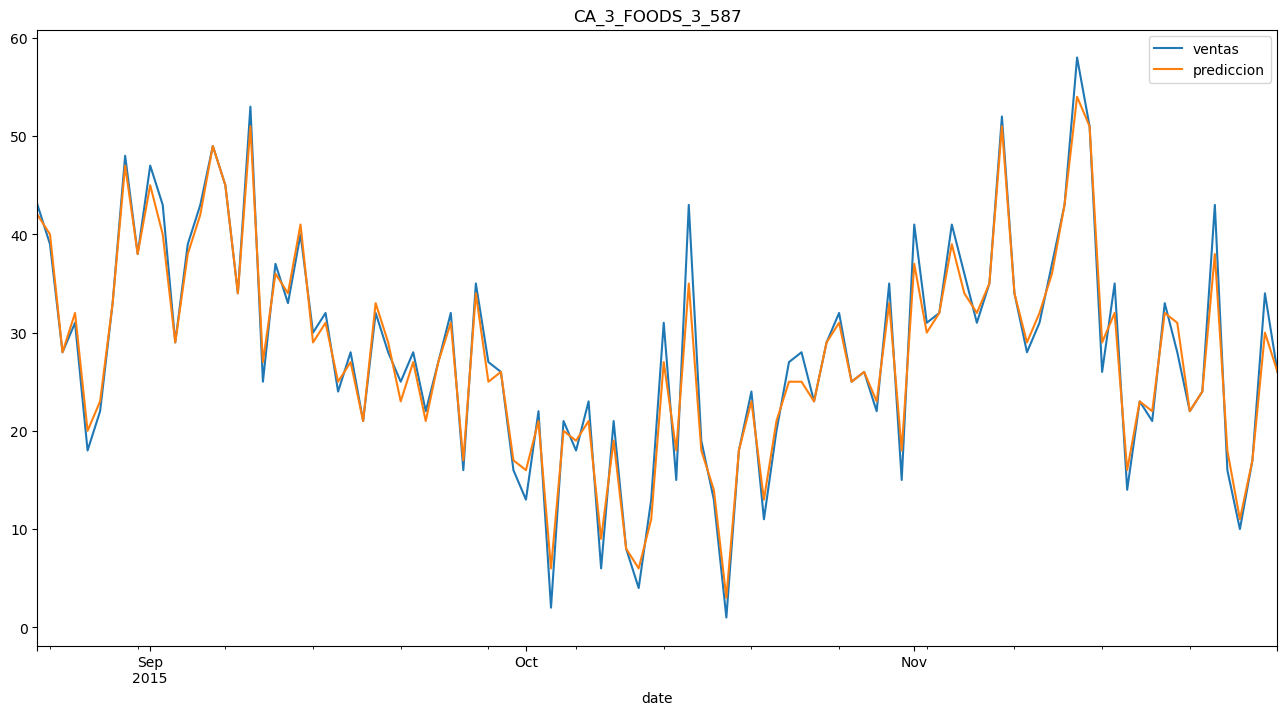

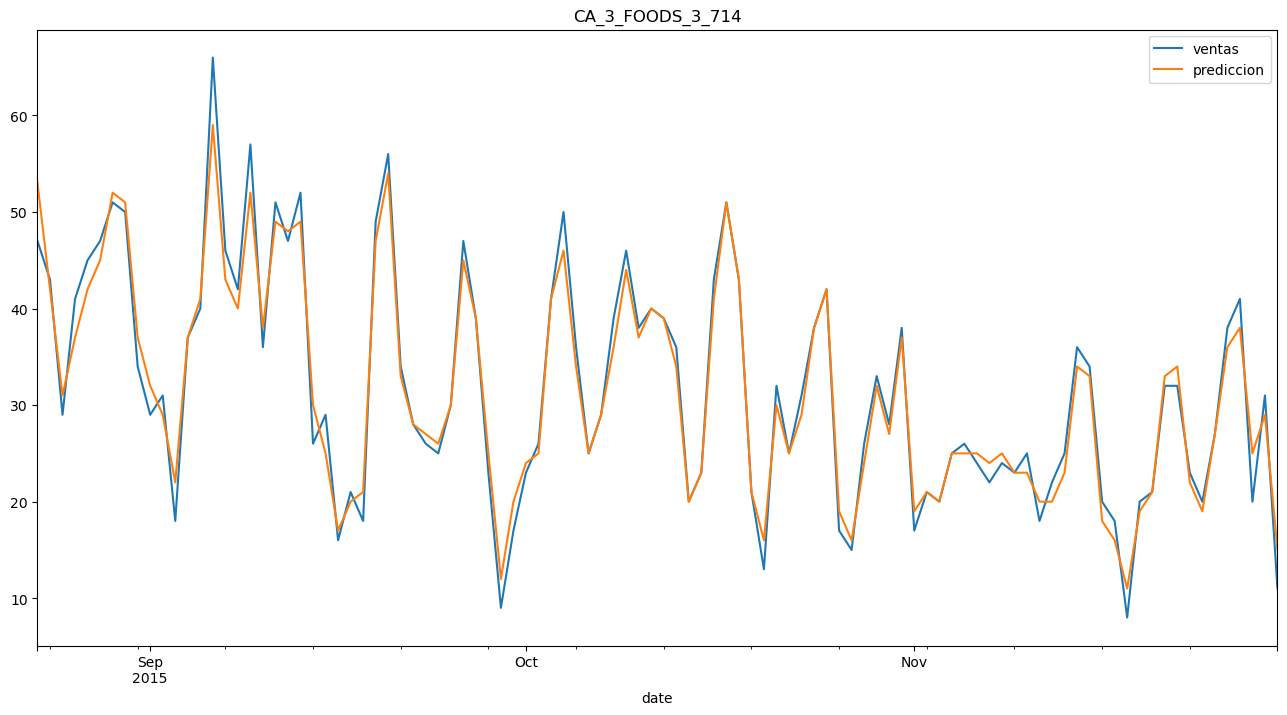

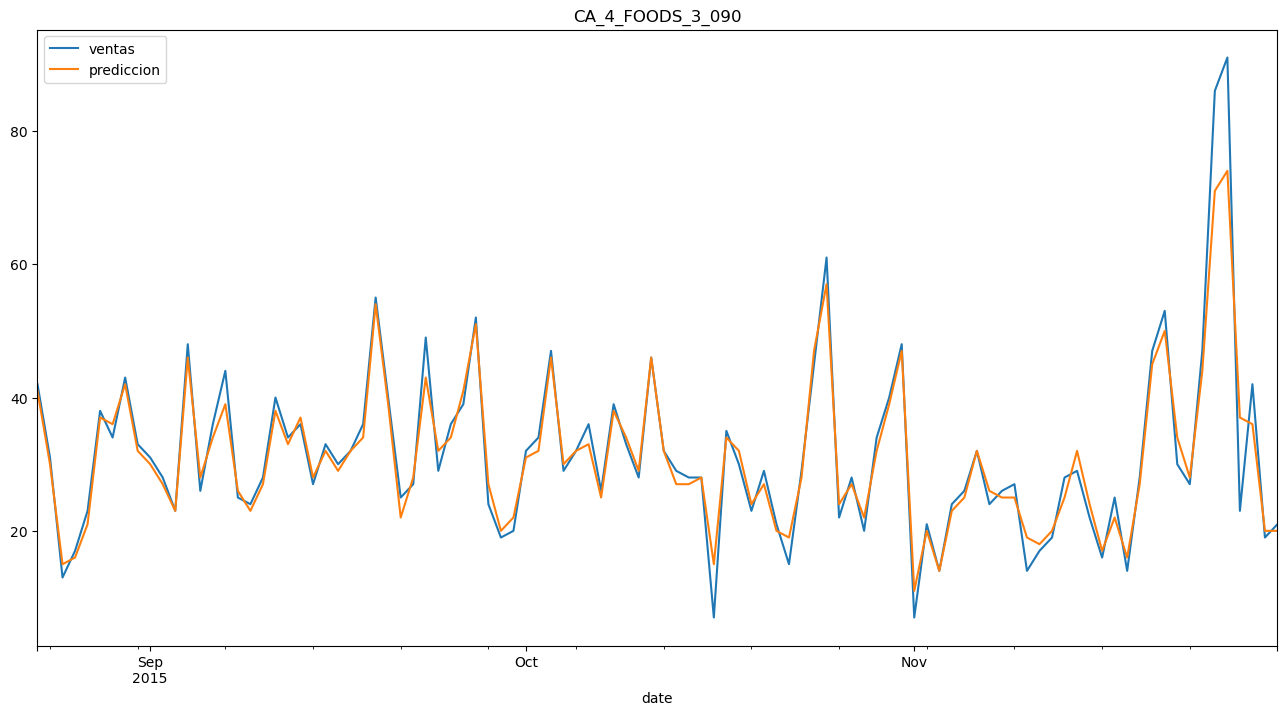

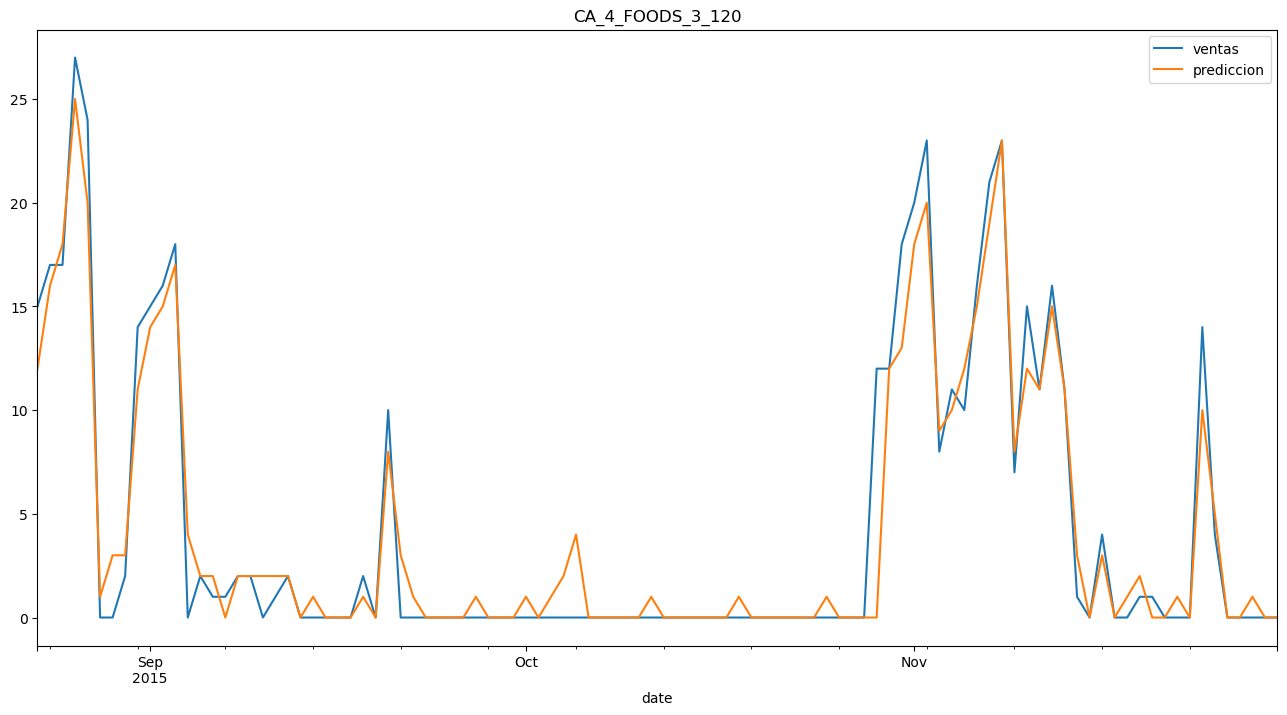

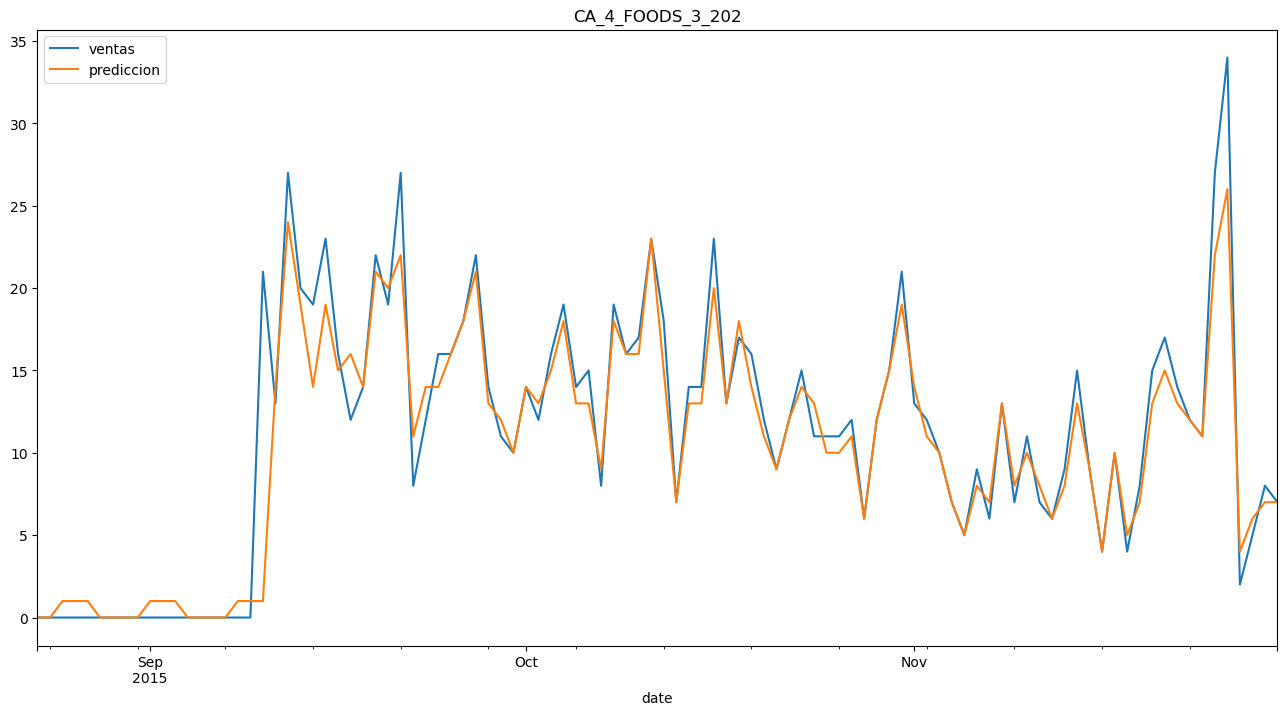

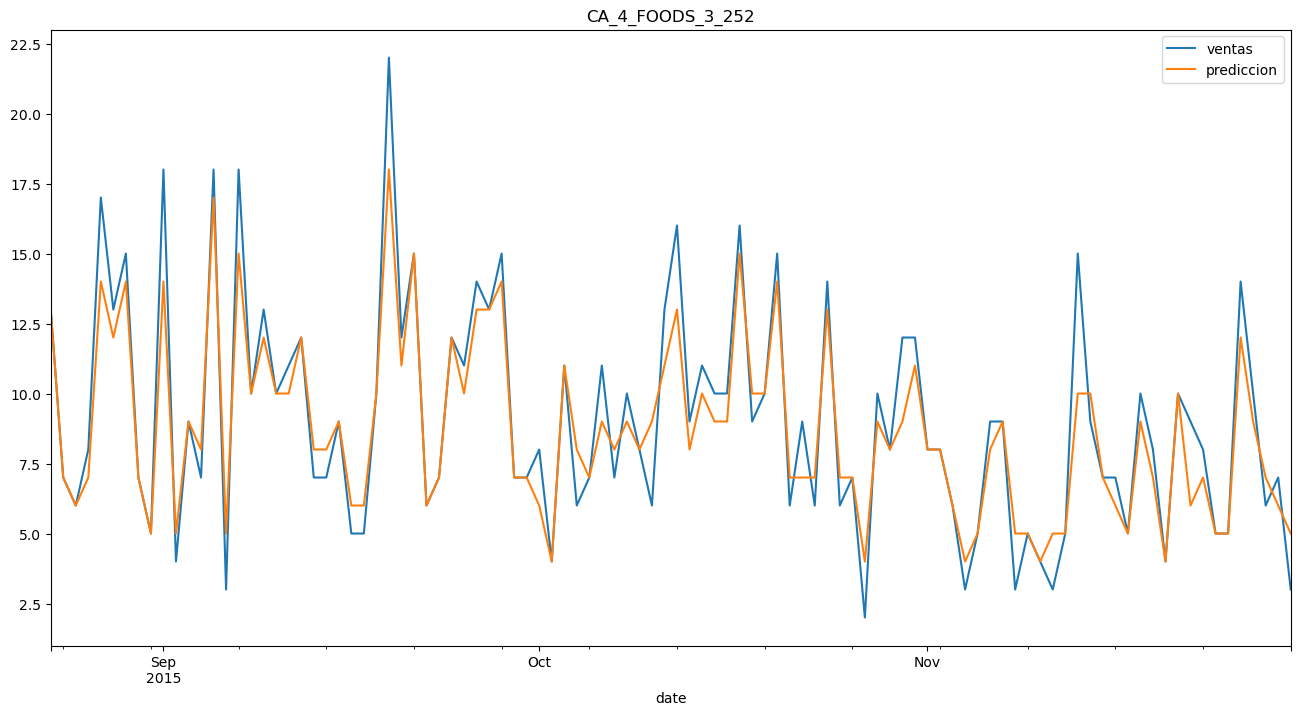

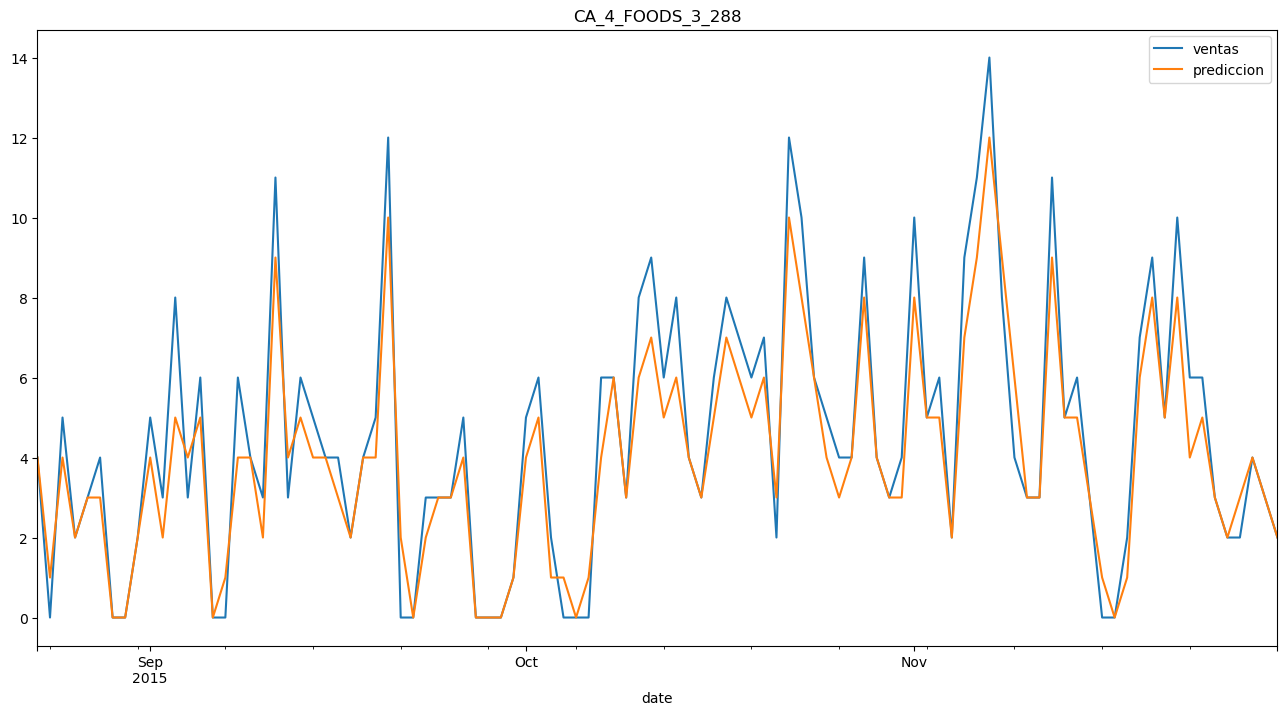

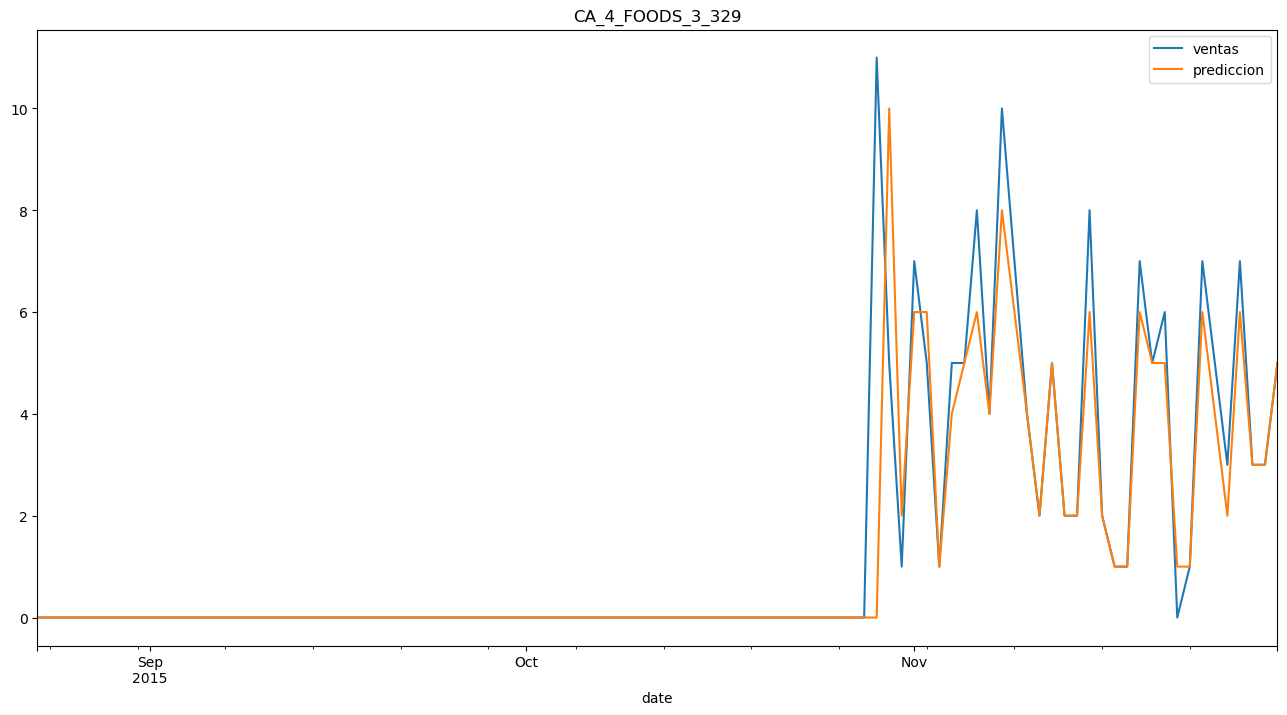

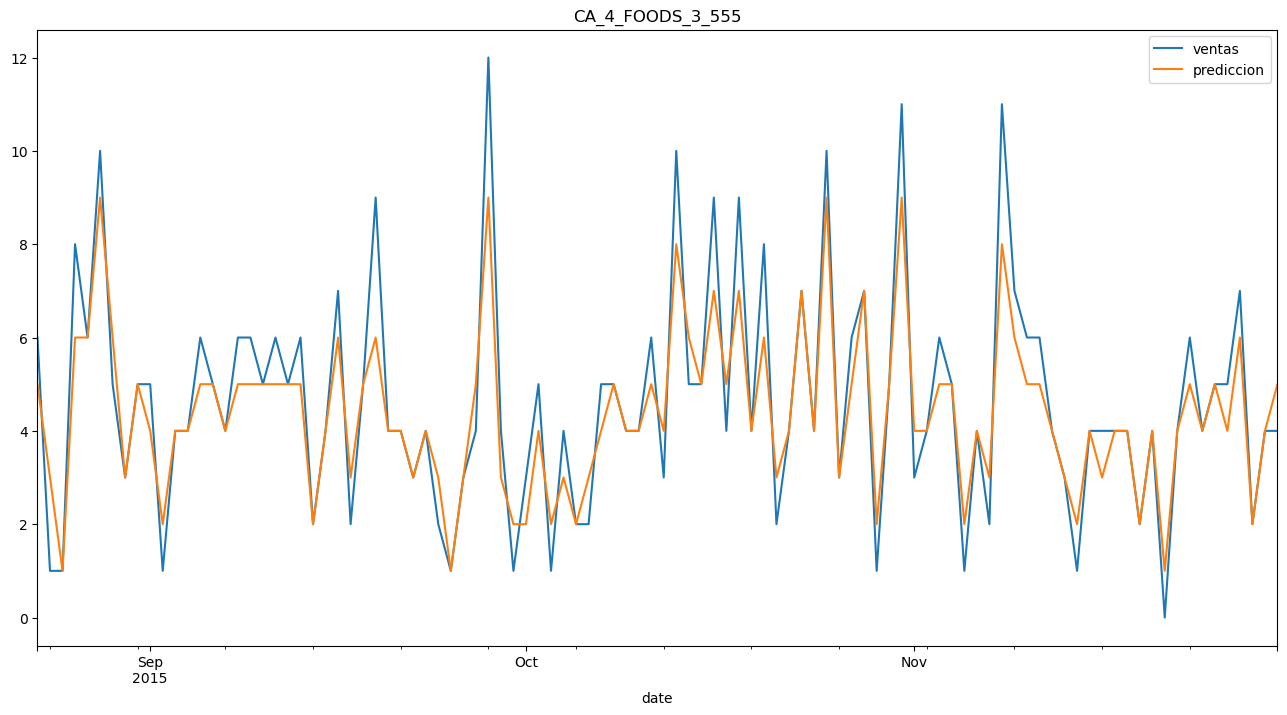

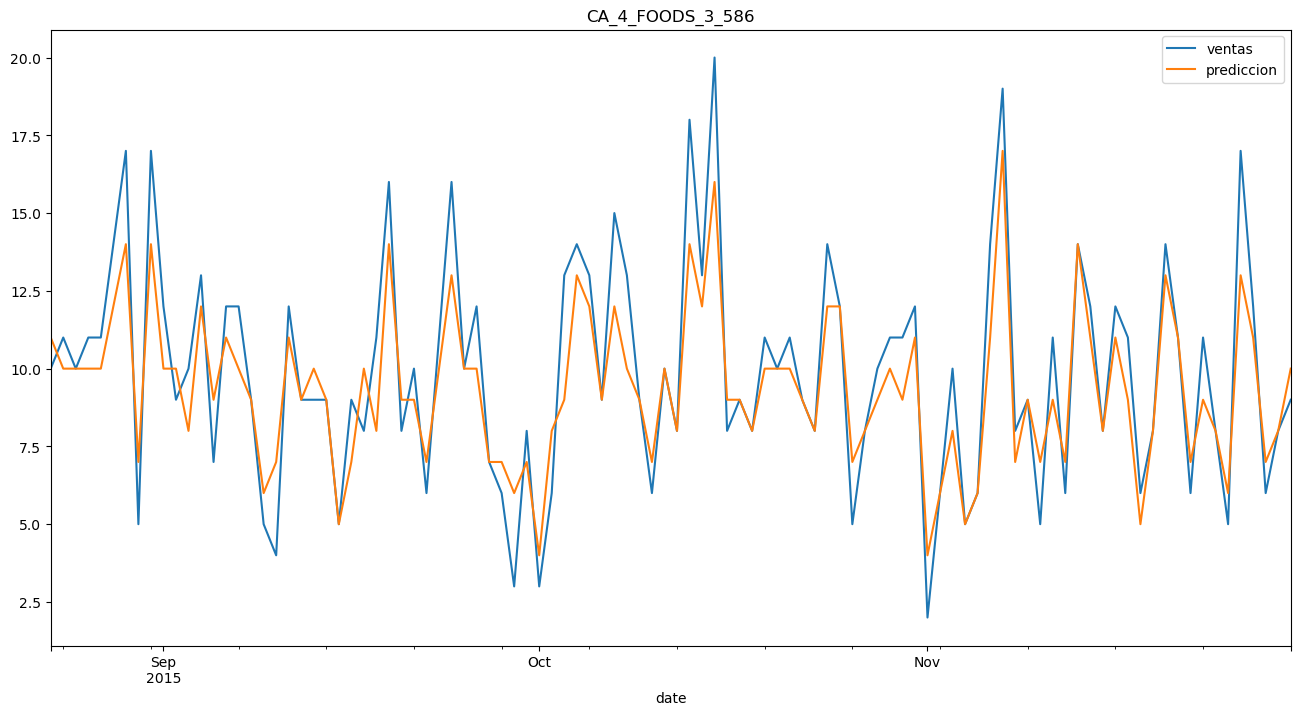

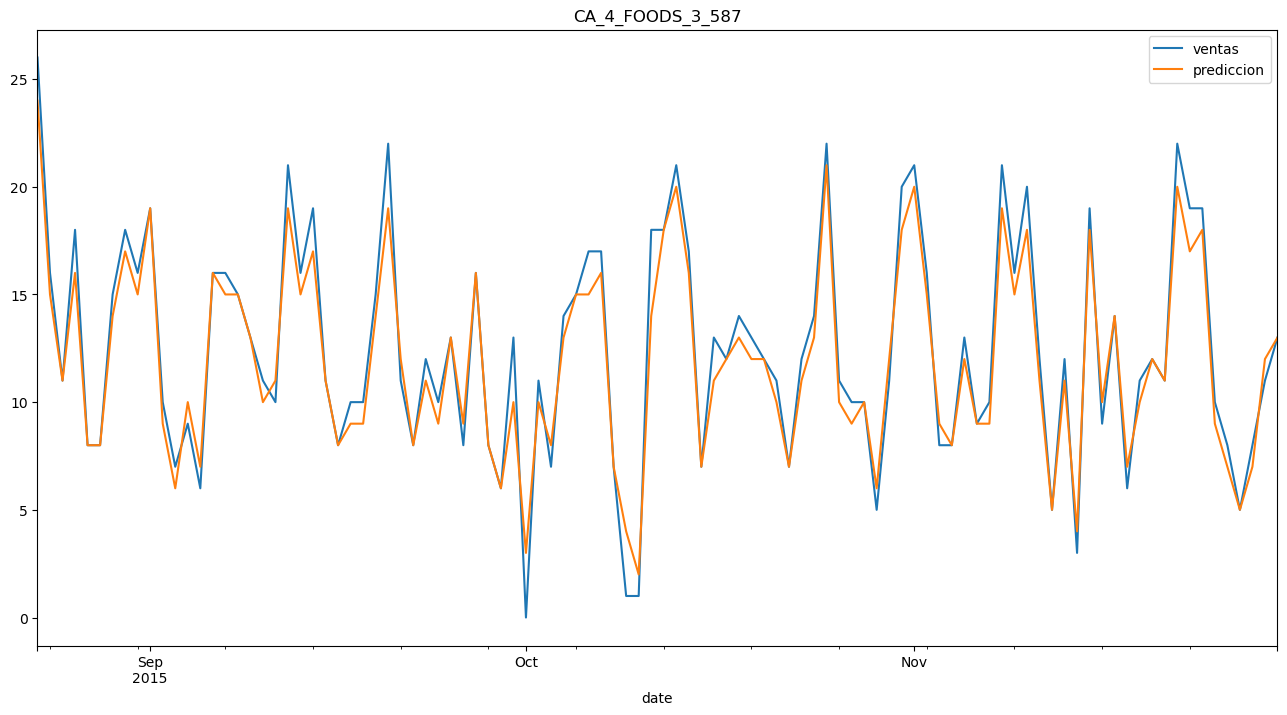

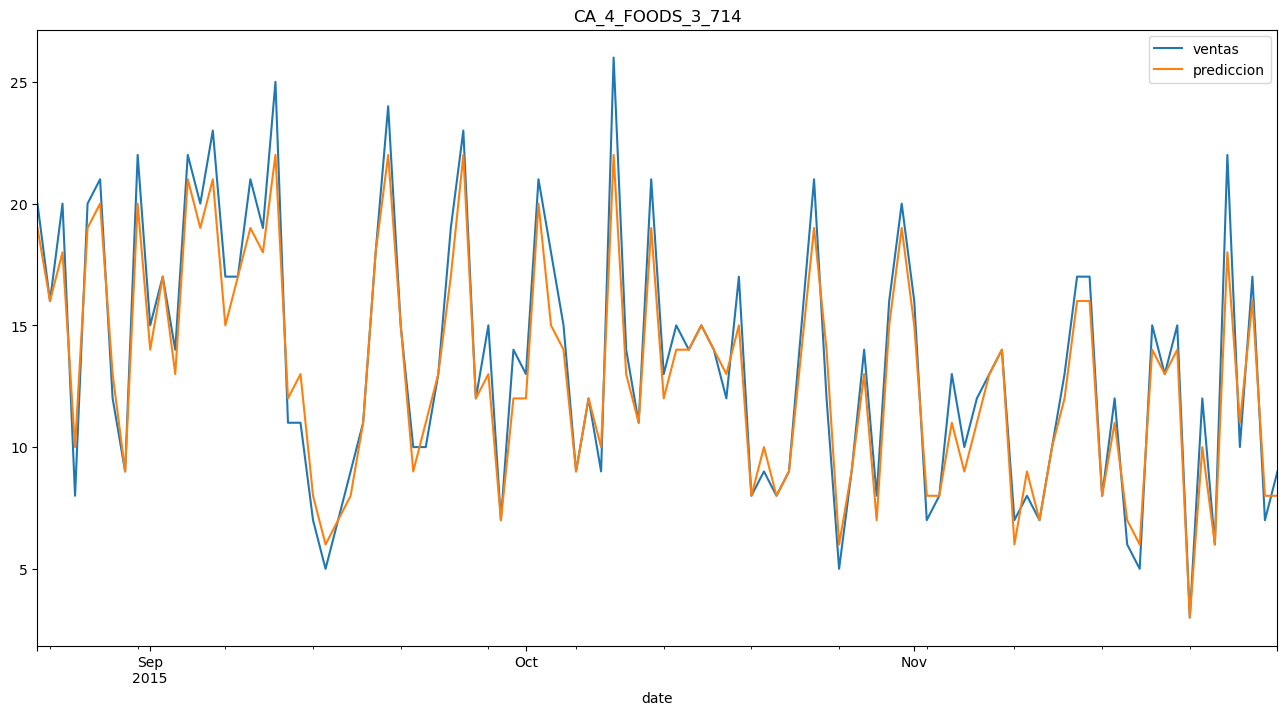

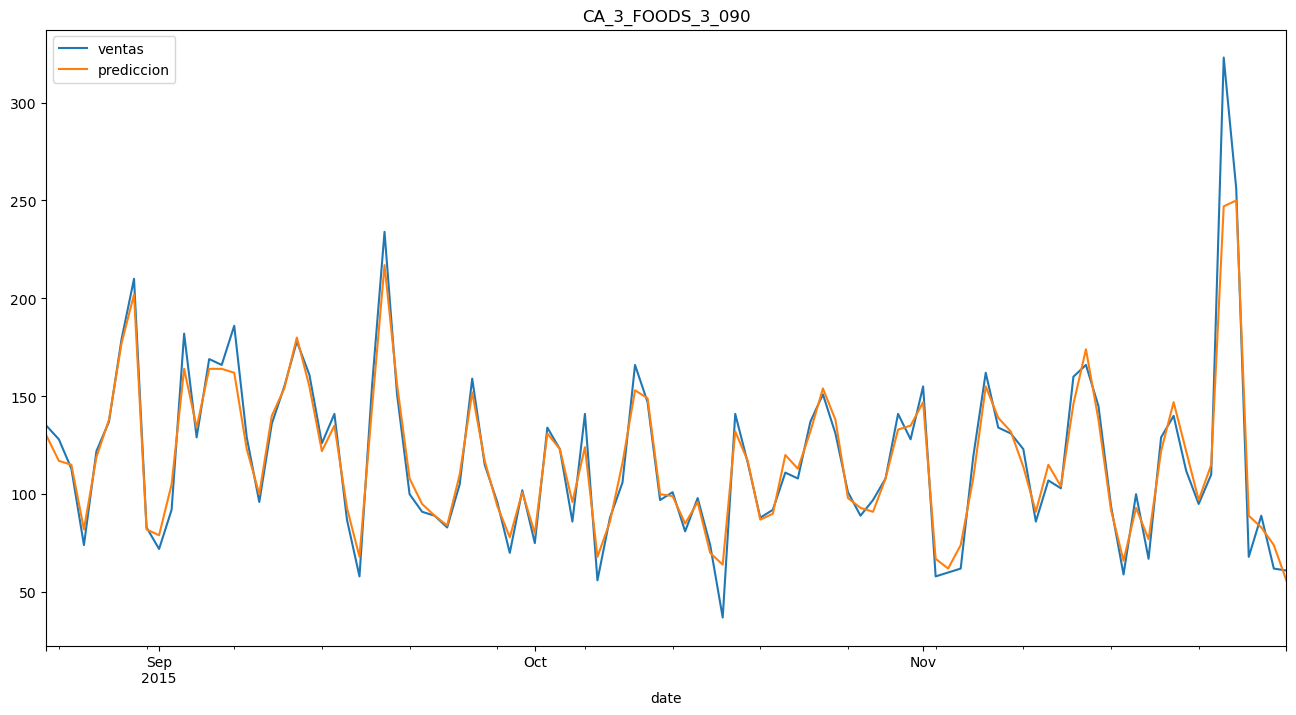

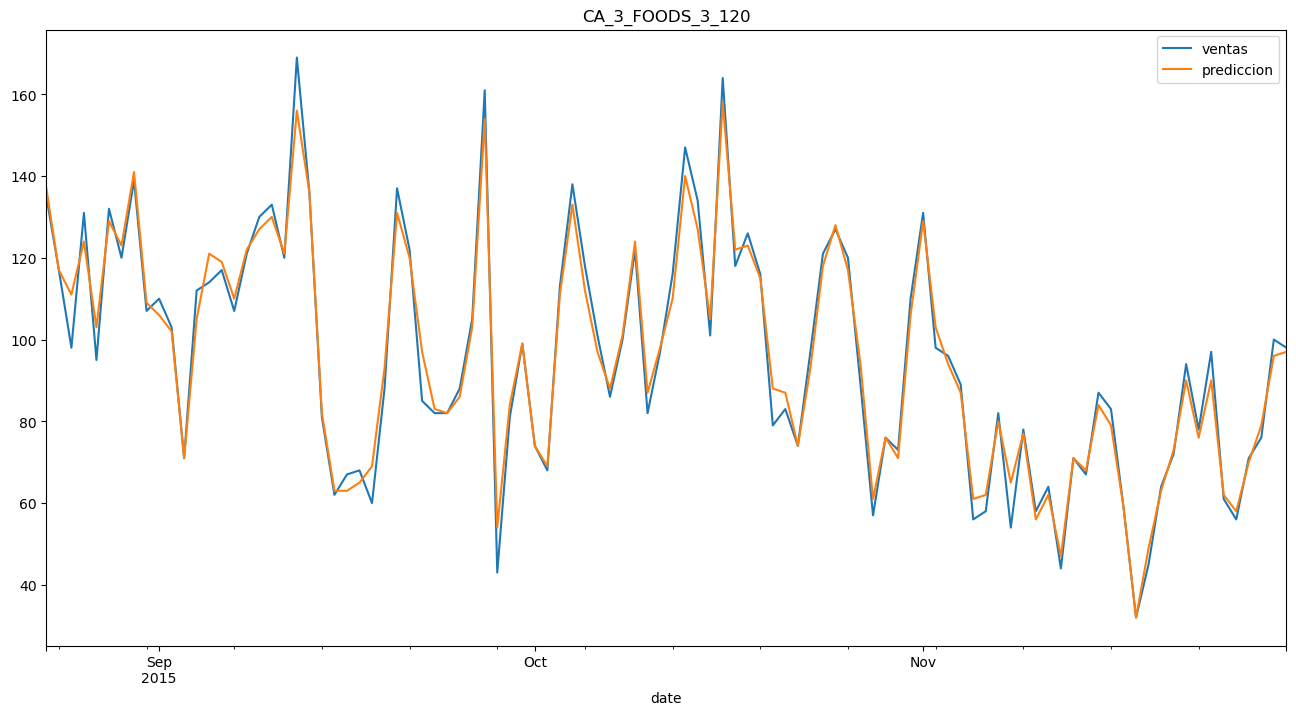

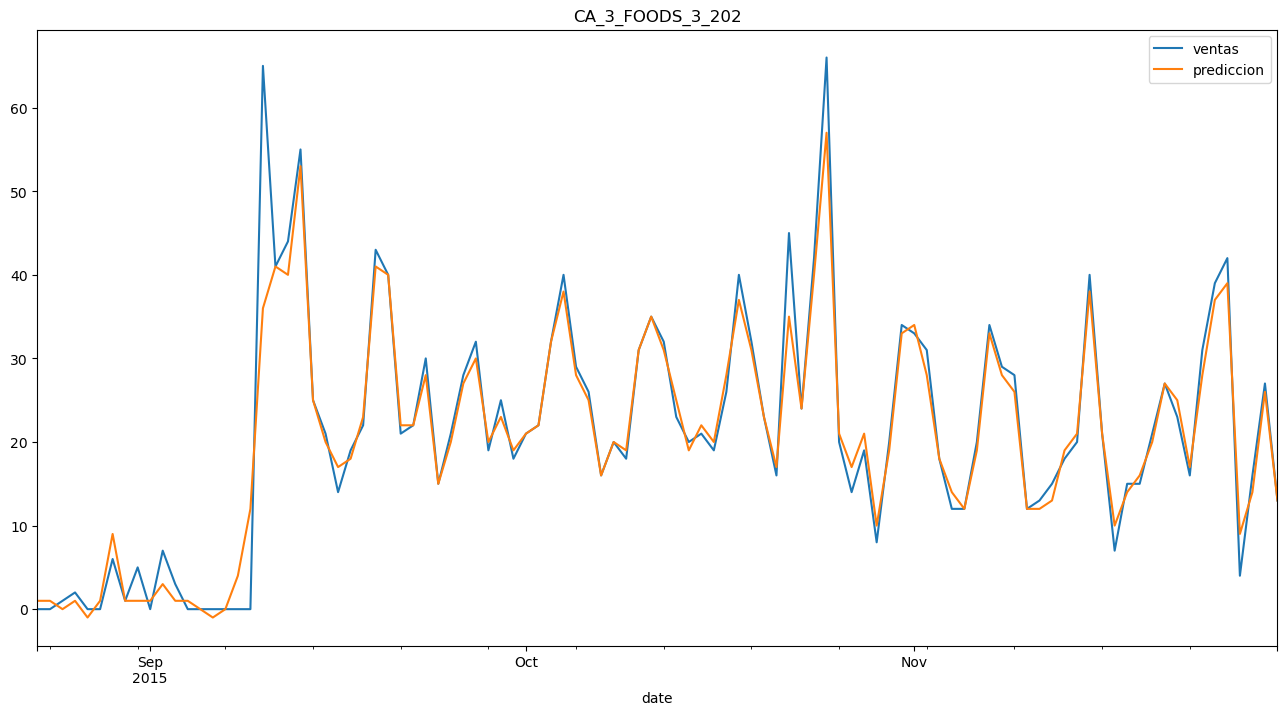

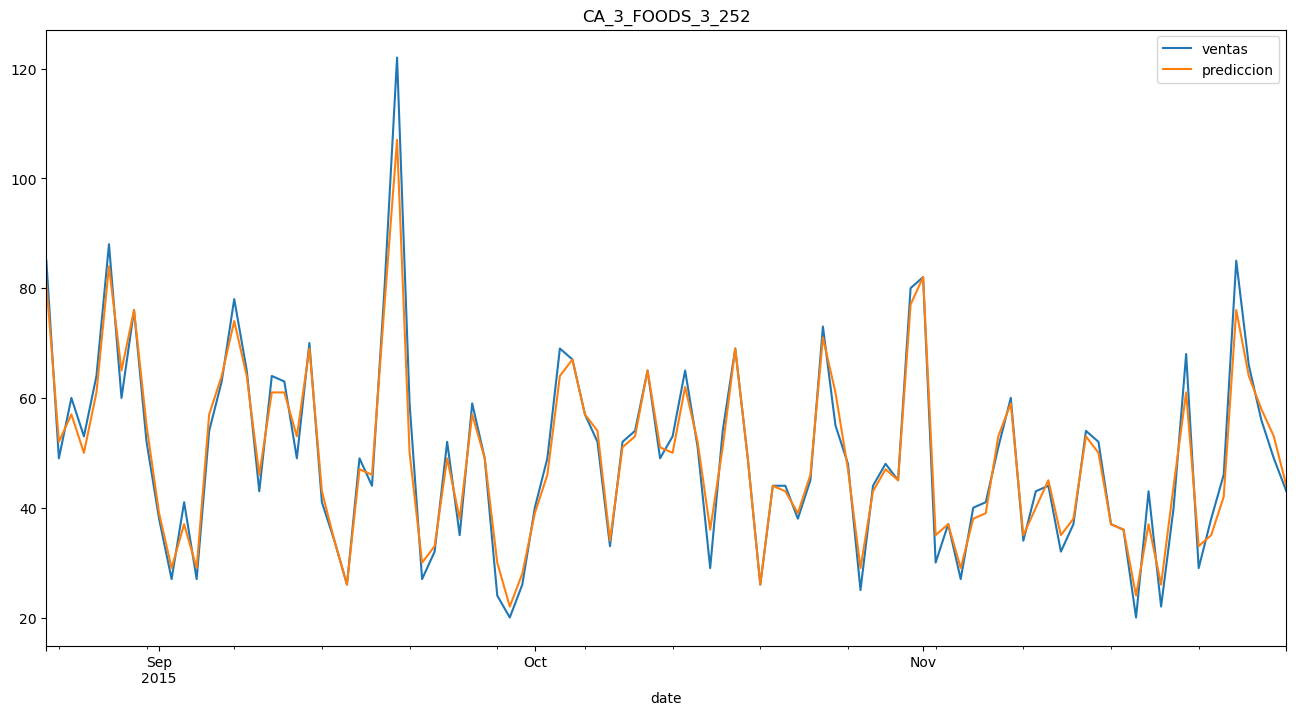

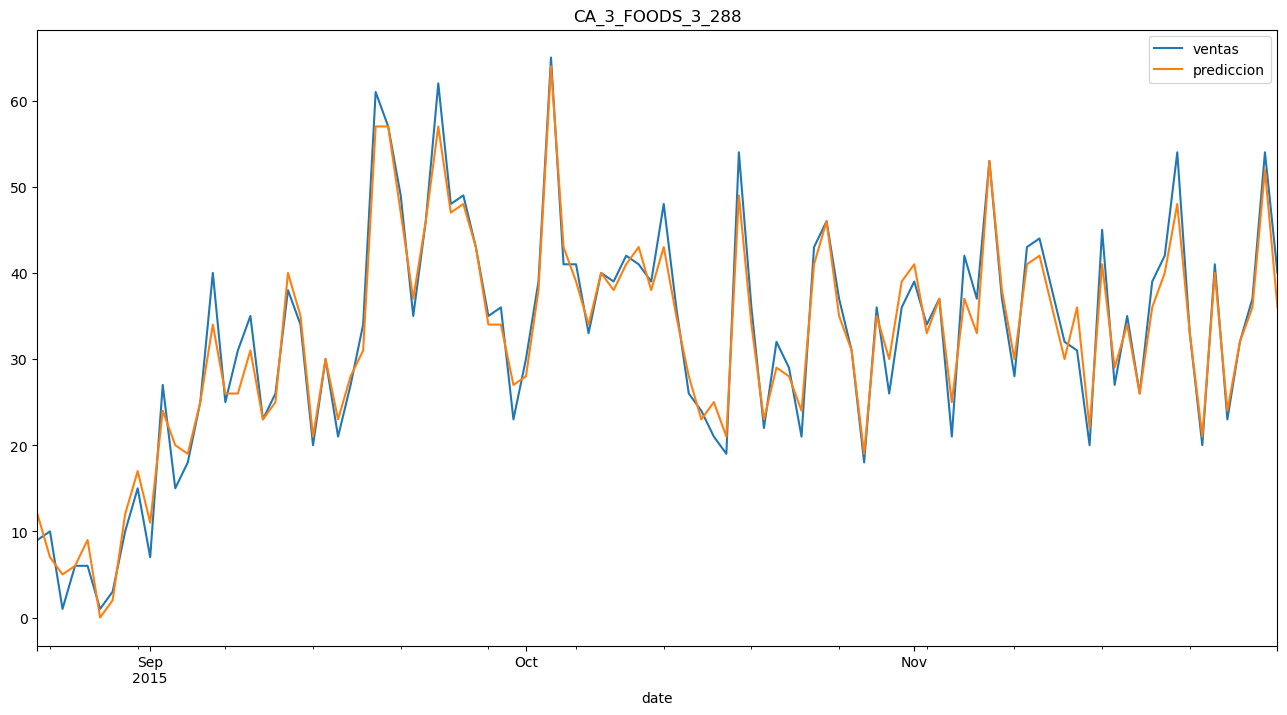

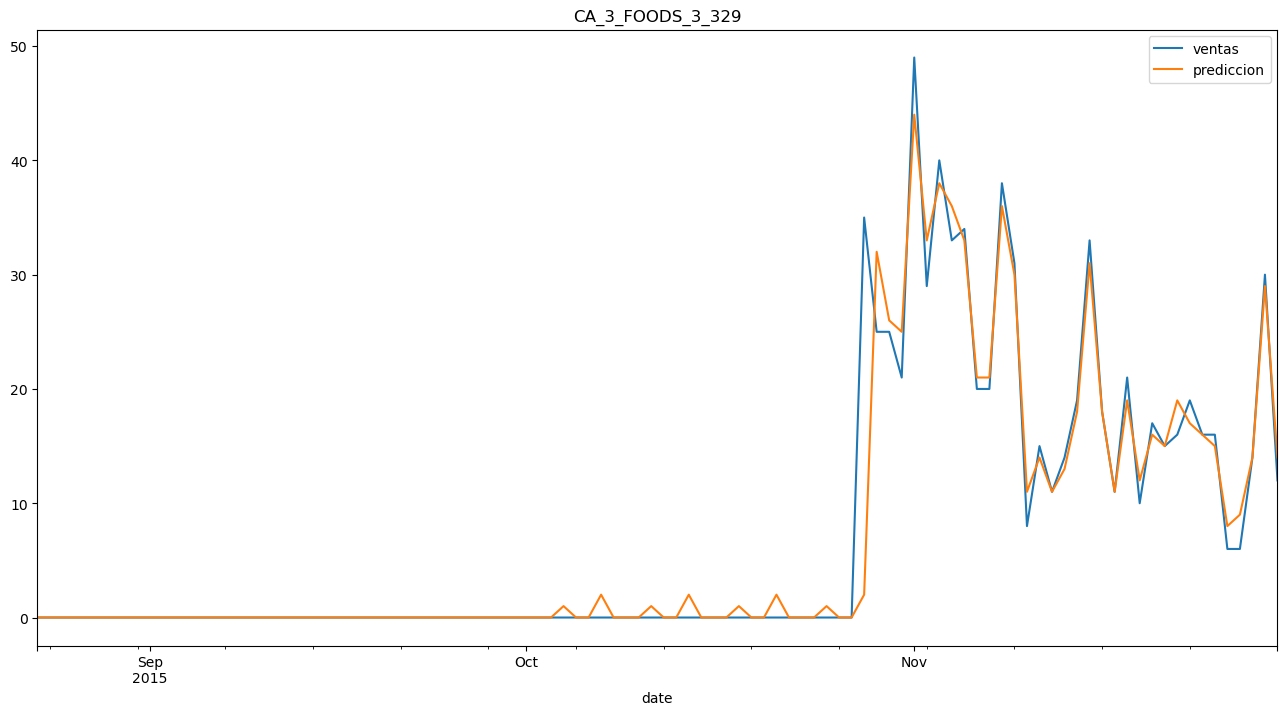

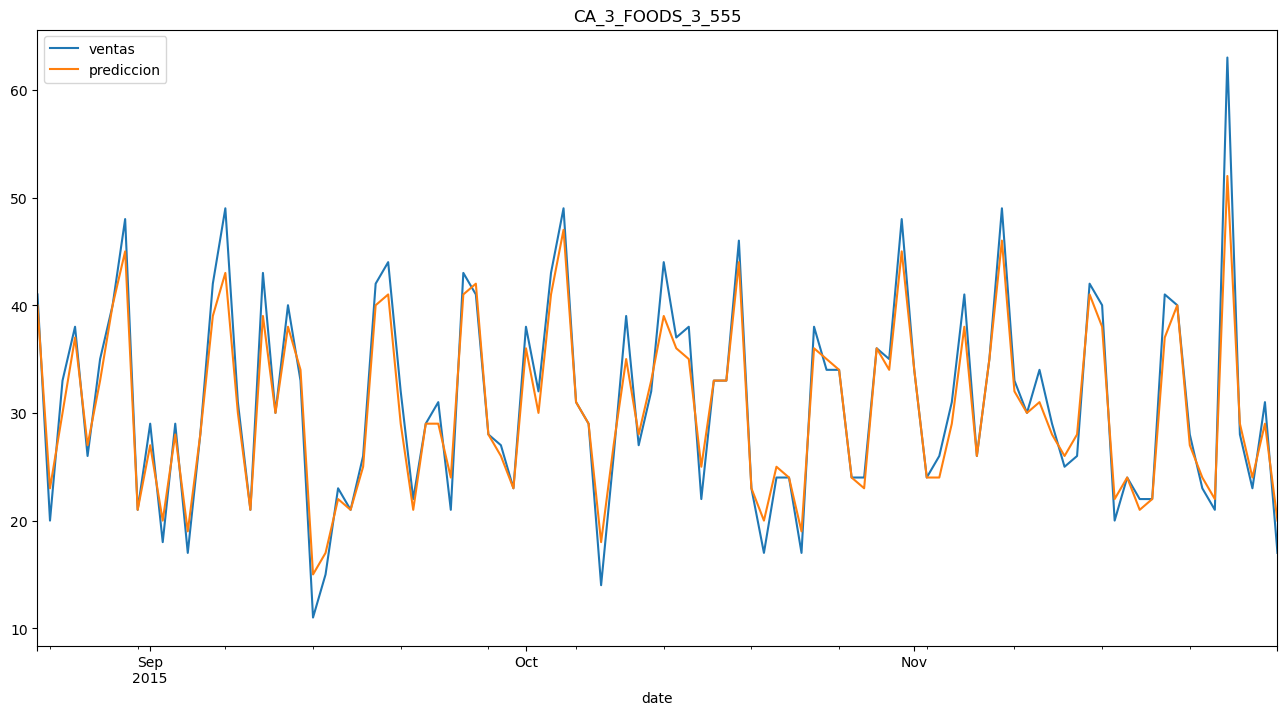

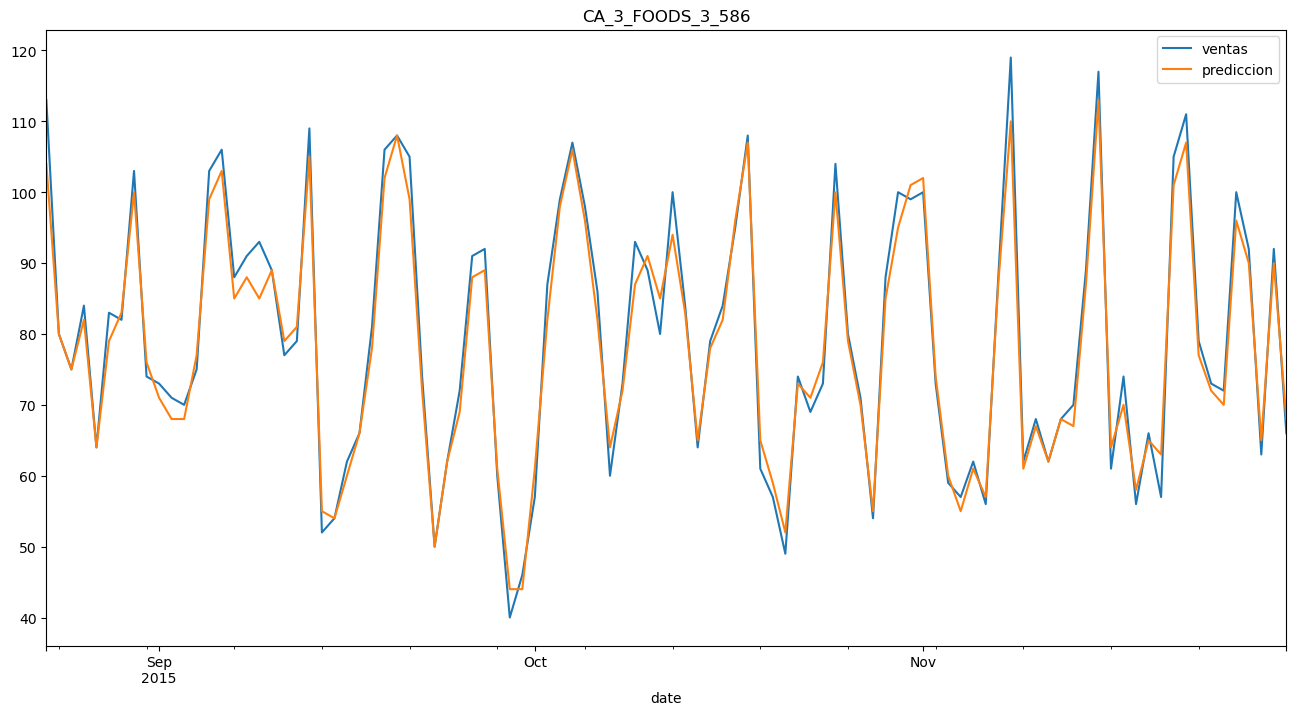

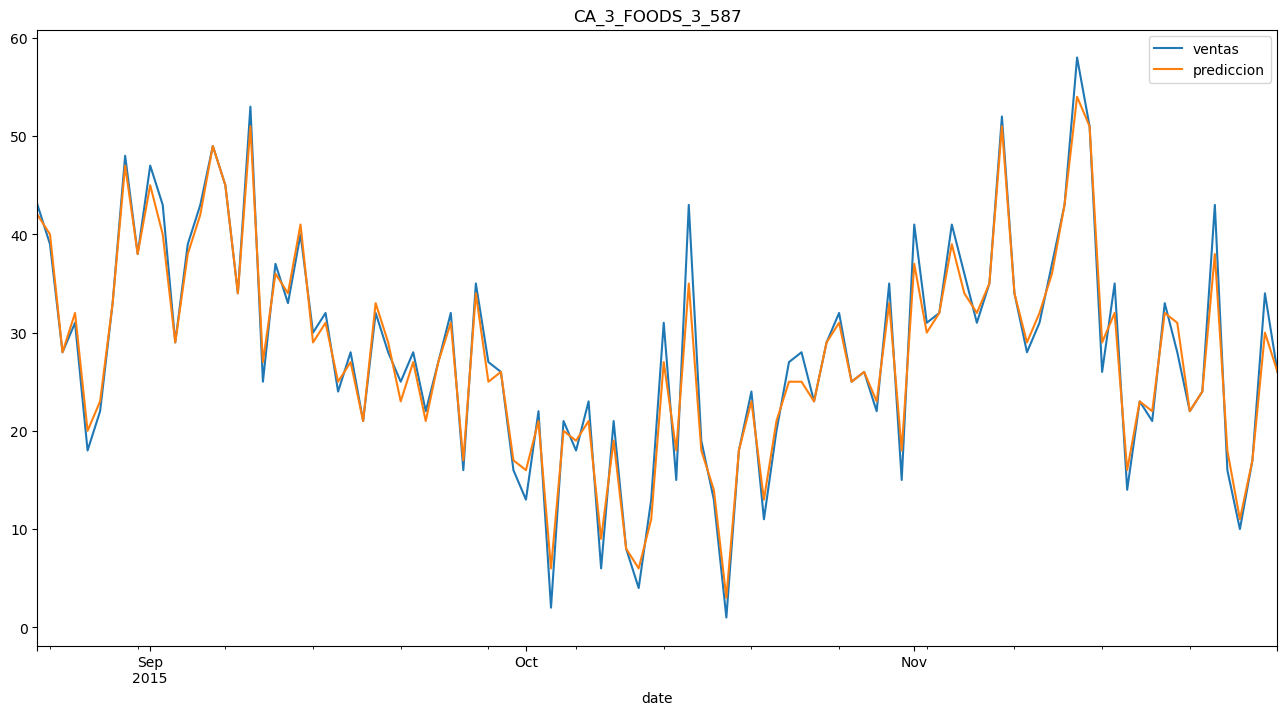

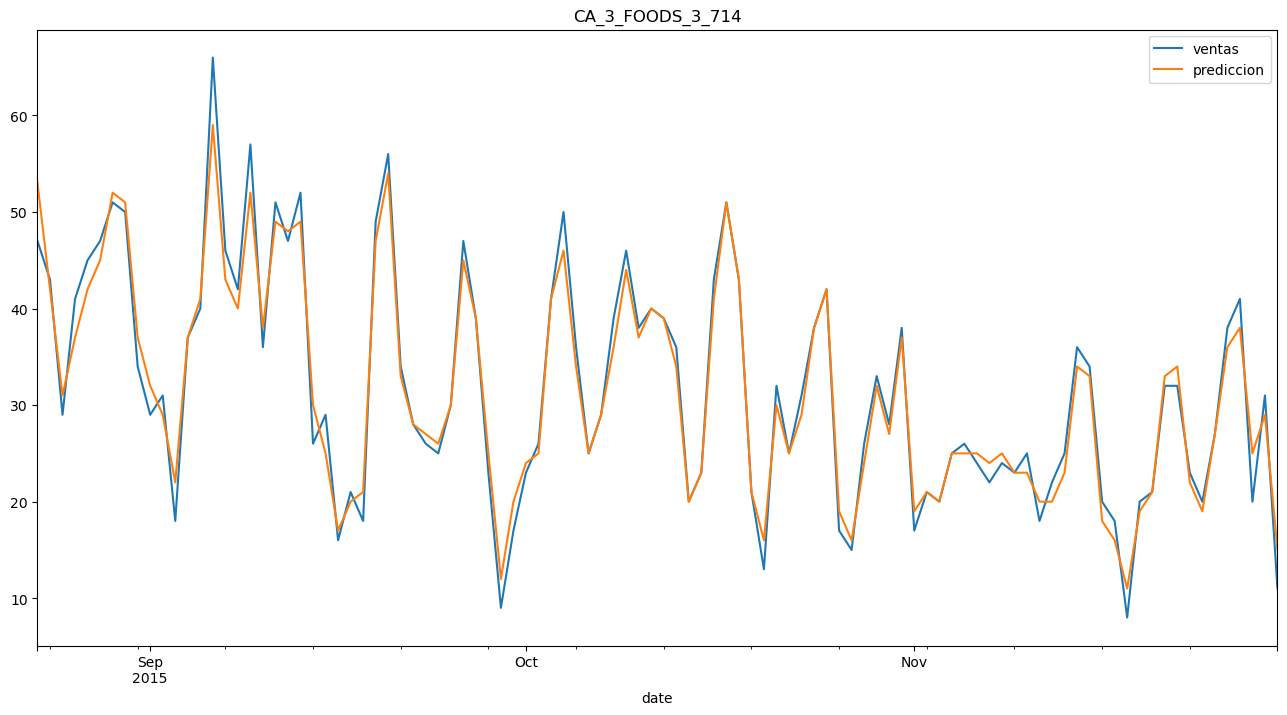

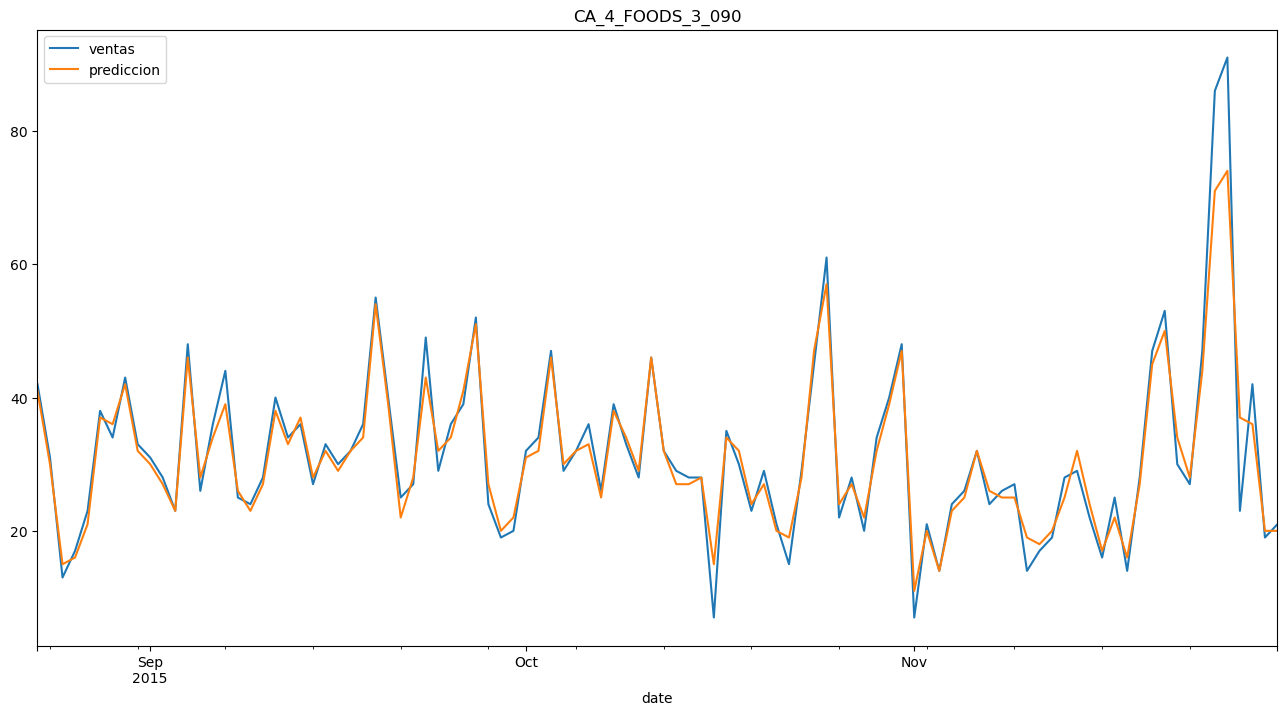

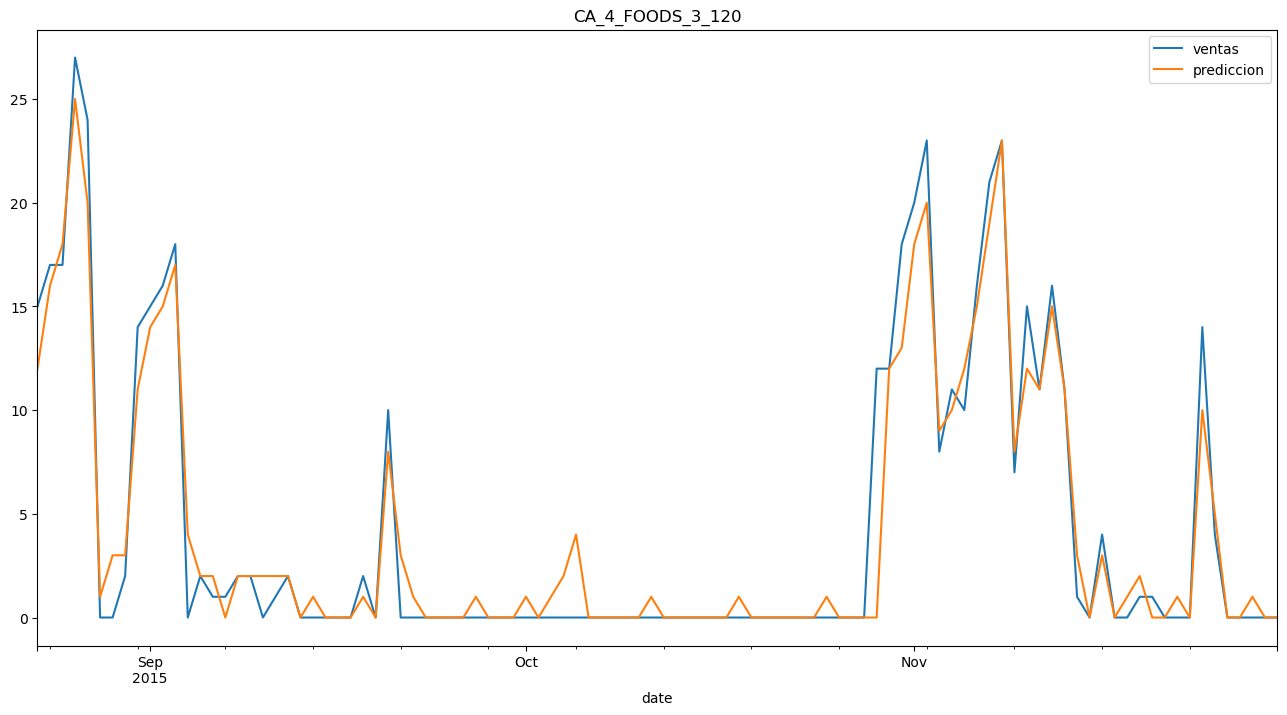

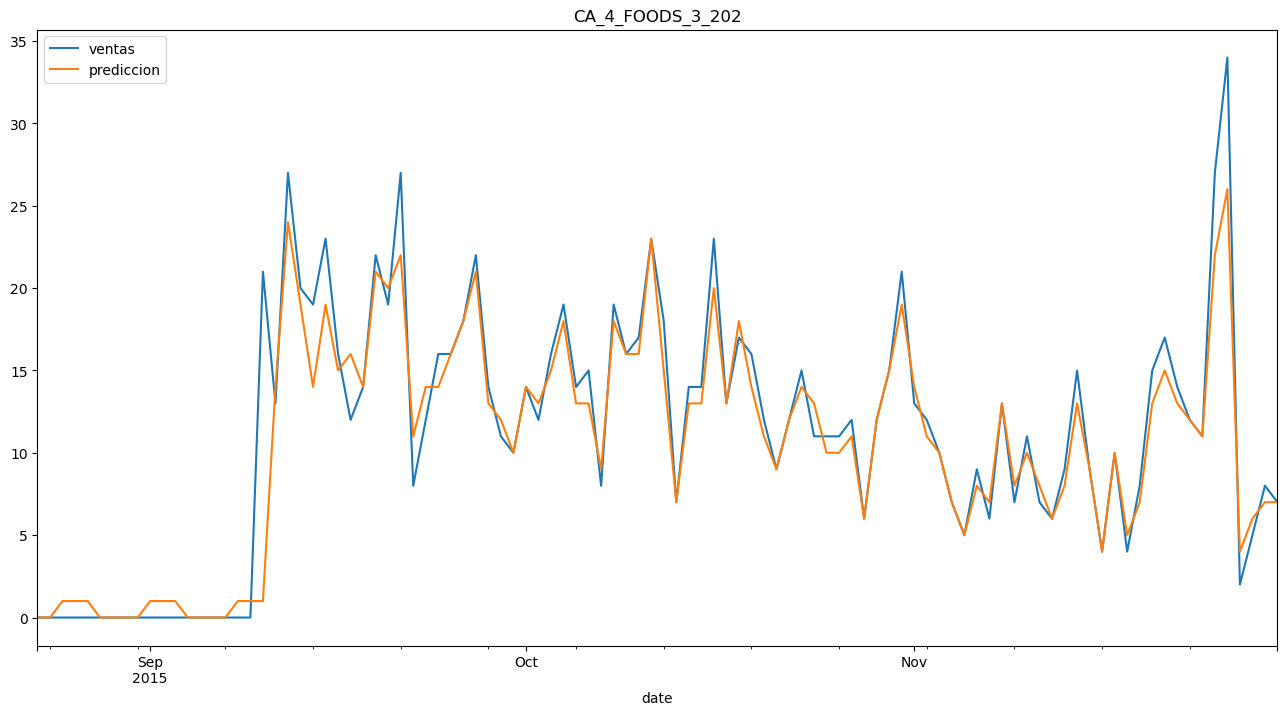

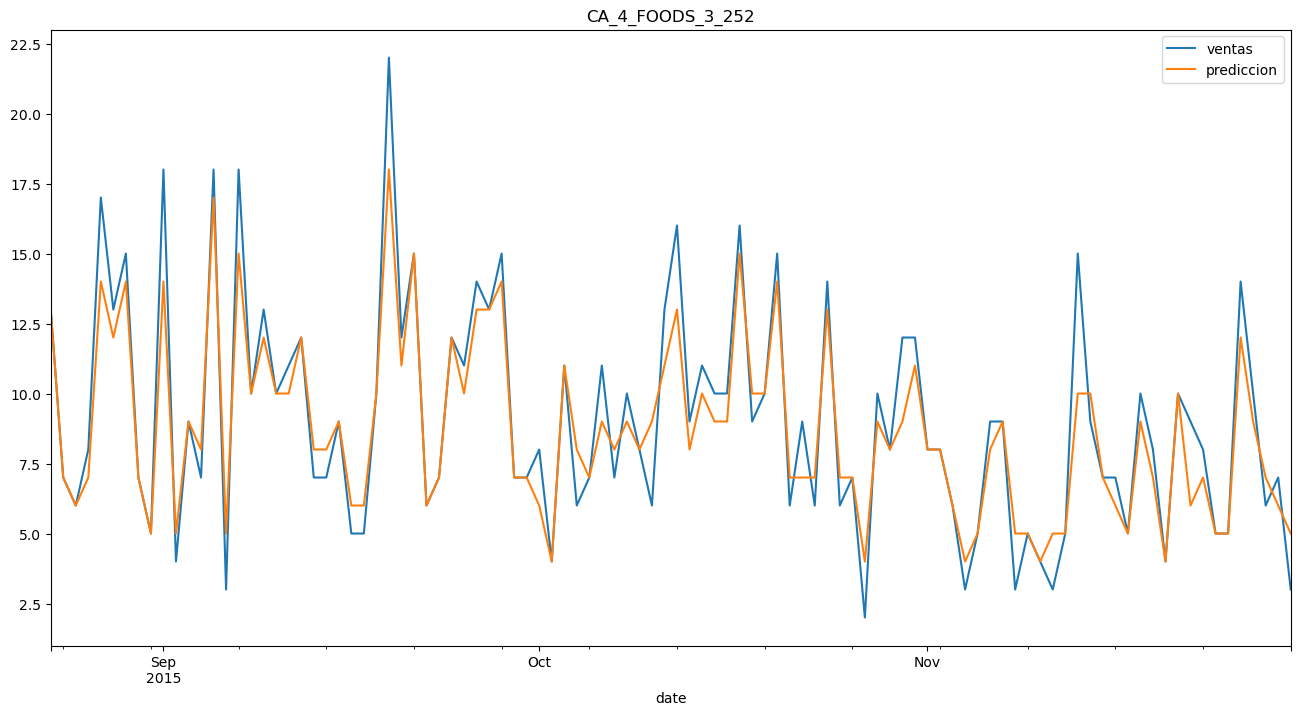

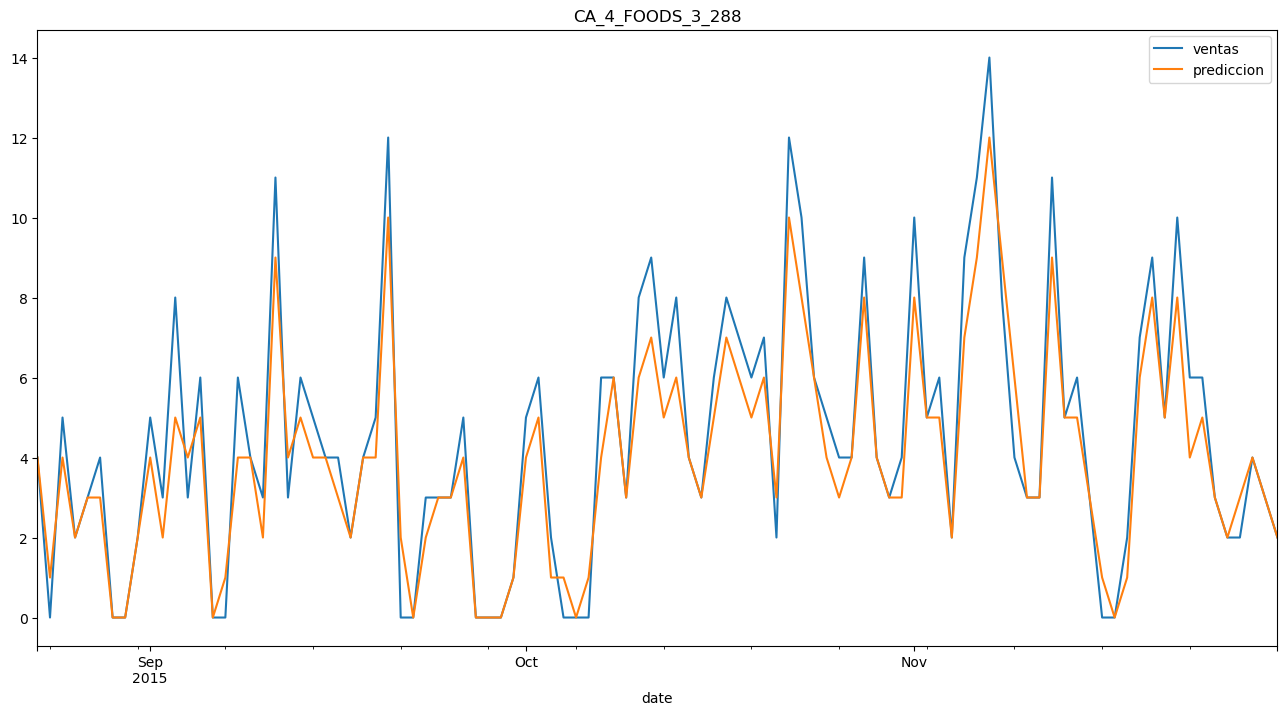

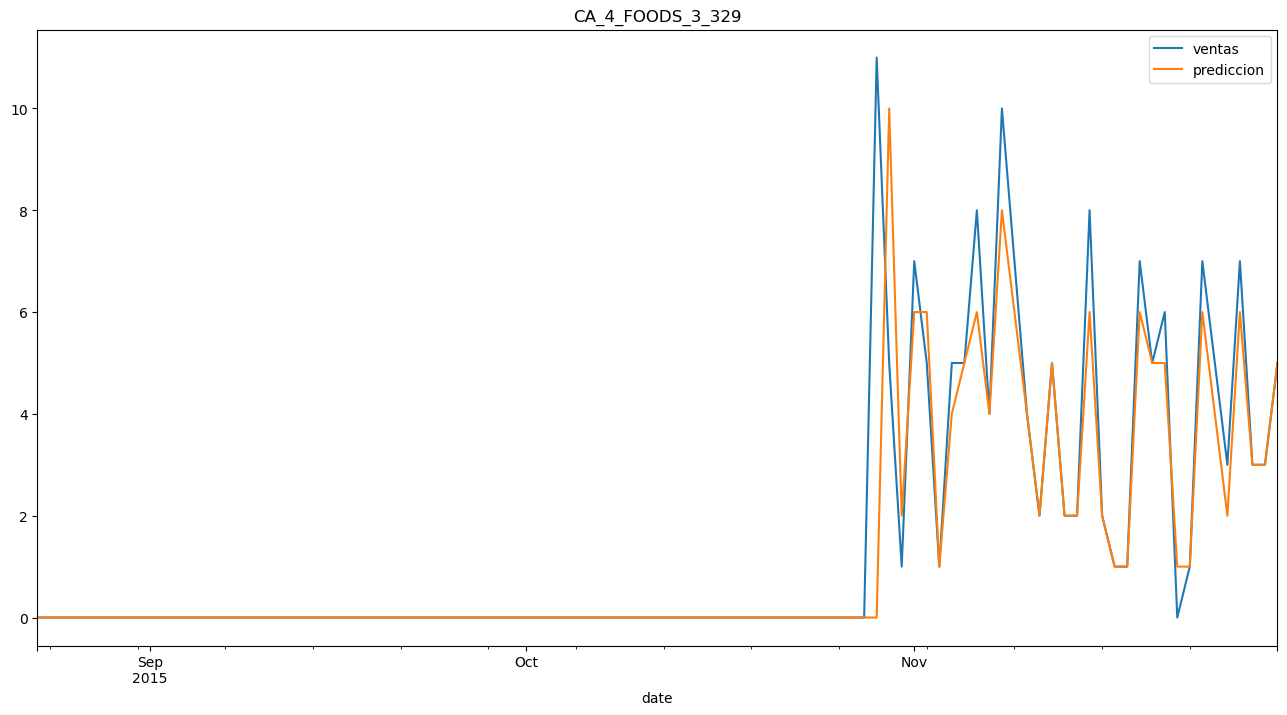

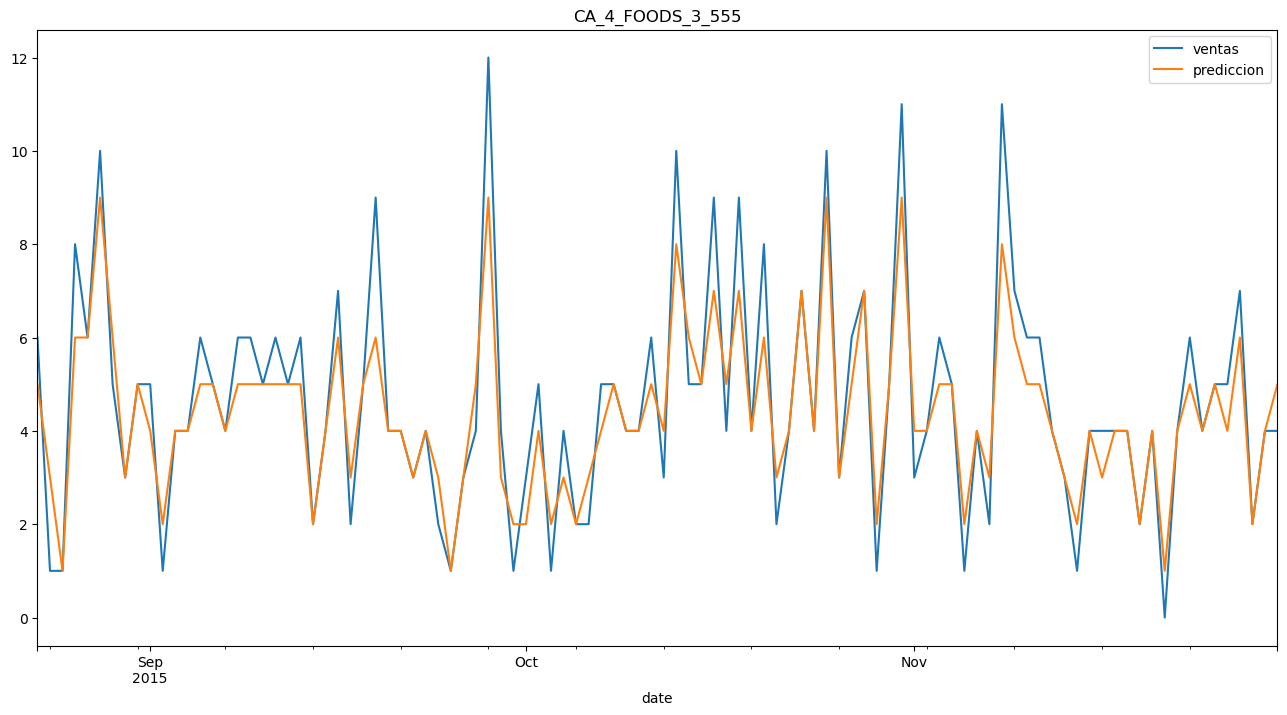

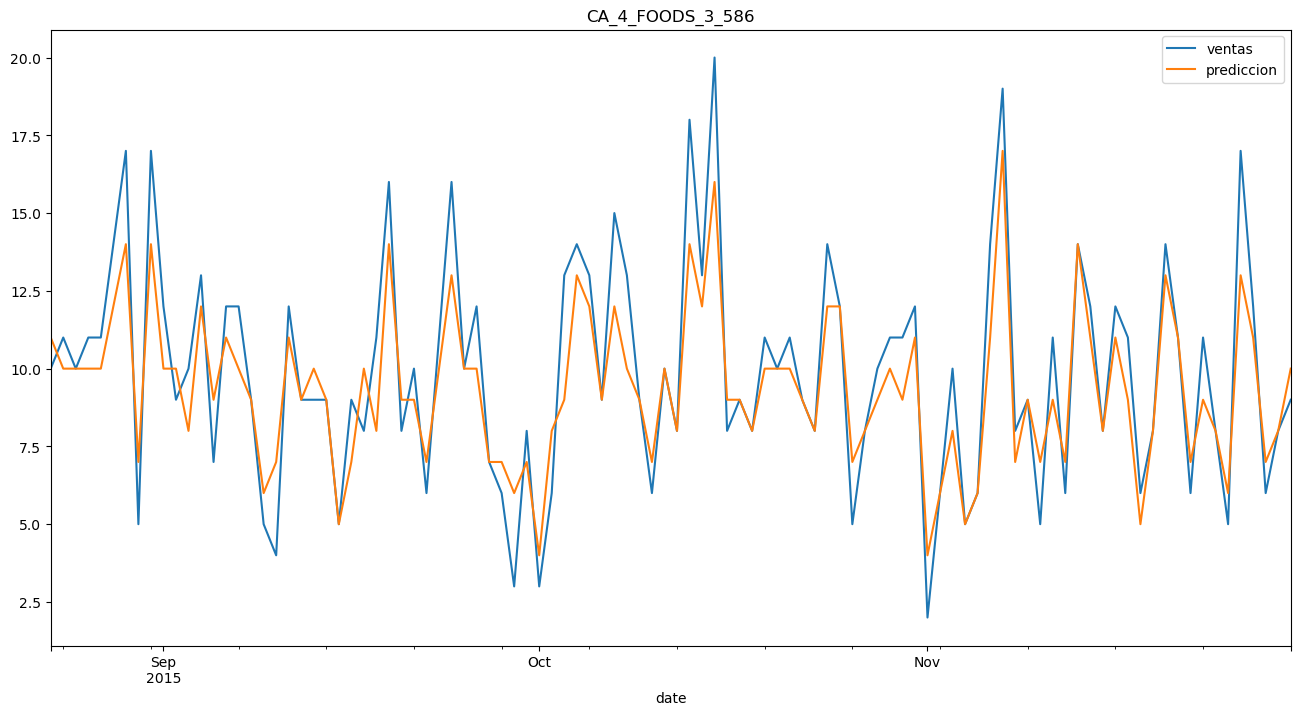

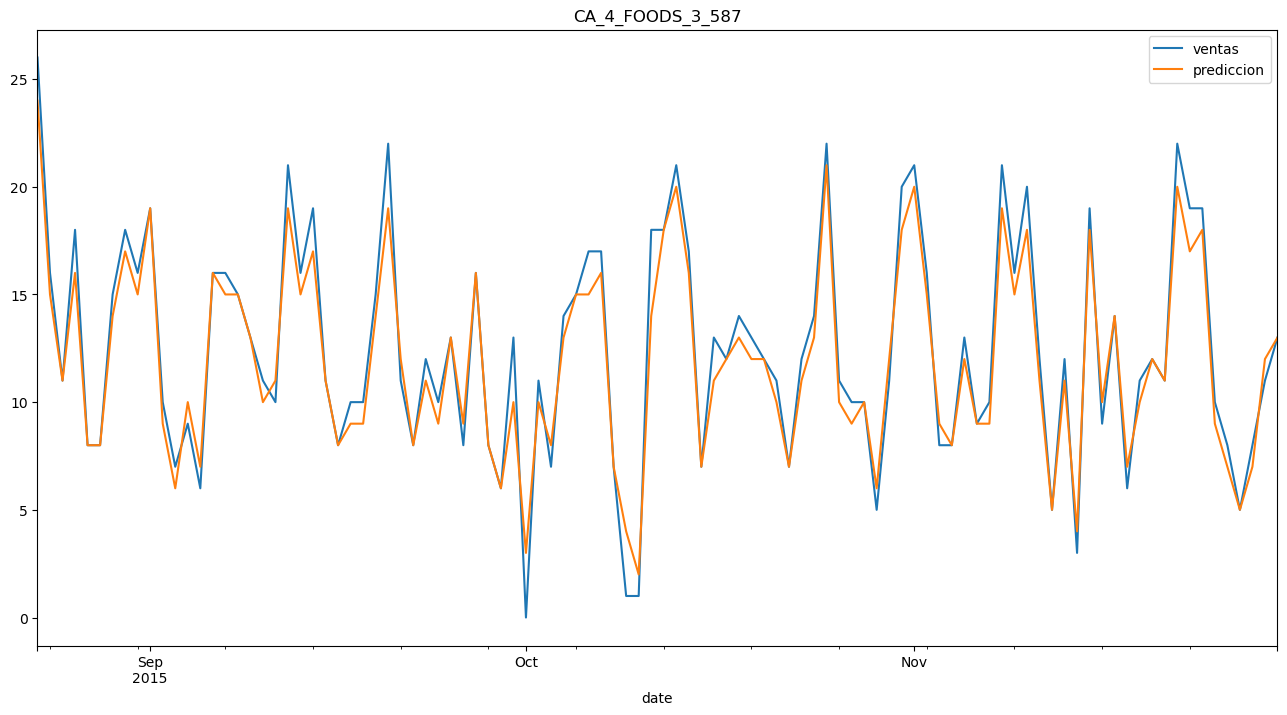

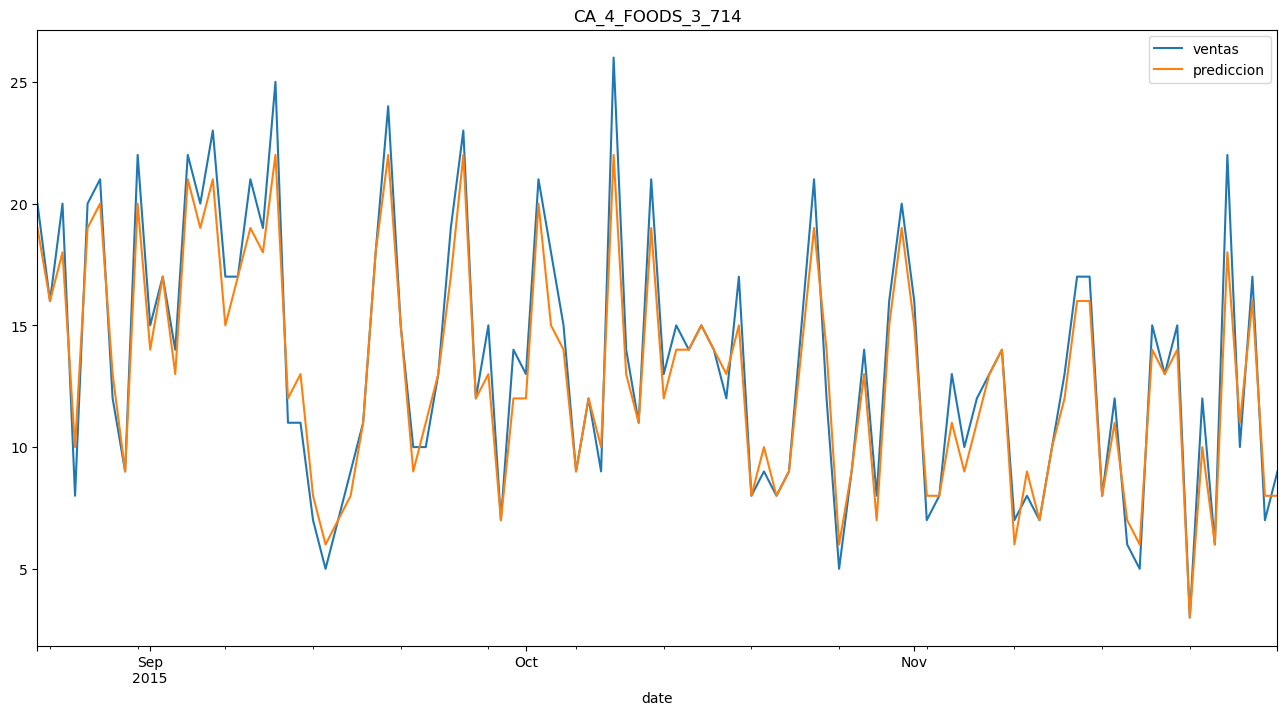

In [38]:
#unificar el df para poder extraer los x e y de cada producto
df =  pd.concat([x, y],axis=1)

for cada in range(0, len(lista_modelos)):
    
    #Prepara los datos necesarios
    producto = lista_modelos[cada][0]
    modelo = lista_modelos[cada][1]
    # Extraemos las variables que ha seleccionado este modelo concretamente
    variables = modelo[0].feature_names_in_
    target = 'ventas'

    x_prod = df.loc[df.producto == producto].drop(columns=target).copy()
    y_prod = df.loc[df.producto == producto,'ventas'].copy()

    date = x_prod.date.values
    
    #Genera graficos de predicho vs real
    predicciones = pd.DataFrame(data={'date': date,
                                      'producto': producto,
                                      'ventas': y_prod,
                                      'prediccion': modelo.predict(x_prod[variables])})

    predicciones['prediccion'] = predicciones.prediccion.astype('int')
    predicciones.set_index('date', inplace=True)

    predicciones.tail(100).plot(figsize = (16, 8), title = producto);

## Git / GitHub

> git add .  
> git status -s  
> git commit -m "modelización"  
> git push